In [6]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/6d/c8/46d355b3c2d04881ce745c667eba6b08ea2215a1ccae875c64b725c3d348/statsmodels-0.14.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/32/0e/0039df17094e8d9d26b69bd8e976e179b1f6cc772f9ffb597640d5016772/patsy-0.5.5-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.8 MB 19.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/9.8 MB 14.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.8 MB 13.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.8 MB 13.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 12.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.8 MB 11.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.

In [18]:
!pip install mlxtend

In [11]:
# 수치 계산에 사용하는 라이브러리
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

#통계 모델 추정하는 데 사용하는 라이브러라
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [18]:
# 한글 폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프에 마이너스 기호
plt.rcParams['axes.unicode_minus'] = False


In [19]:
df = pd.read_csv('final.csv', encoding = 'ANSI')
df.head()

시도    시군구        행정번호    년도  우울증환자수  평균연령    총인구수  스트레스인지율   고용률  \
0  서울특별시  서울종로구  1111000000  2018   14837  44.2  153065     34.2  59.6   
1  서울특별시   서울중구  1114000000  2018    4352  44.6  125725     28.3  59.6   
2  서울특별시  서울용산구  1117000000  2018    2370  43.6  228999     20.0  59.6   
3  서울특별시  서울성동구  1120000000  2018    3657  42.0  308221     31.3  59.6   
4  서울특별시  서울광진구  1121500000  2018    6917  41.4  355559     29.4  59.6   

   코로나확진자수  1인당 정신건강예산(원)  공공시설개수     우울증지수  
0        0           5326      44  9.693268  
1        0           5326      42  3.461523  
2        0           5326      53  1.034939  
3        0           5326      50  1.186486  
4        0           5326      47  1.945387

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시도             1250 non-null   object 
 1   시군구            1250 non-null   object 
 2   행정번호           1250 non-null   int64  
 3   년도             1250 non-null   int64  
 4   우울증환자수         1250 non-null   int64  
 5   평균연령           1250 non-null   float64
 6   총인구수           1250 non-null   int64  
 7   스트레스인지율        1250 non-null   float64
 8   고용률            1250 non-null   float64
 9   코로나확진자수        1250 non-null   int64  
 10  1인당 정신건강예산(원)  1250 non-null   int64  
 11  공공시설개수         1250 non-null   int64  
 12  우울증지수          1250 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 127.1+ KB


In [21]:
cols = ['평균연령', '우울증환자수', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수', '우울증지수']
final = df[cols]
final.head()

평균연령  우울증환자수    총인구수  스트레스인지율   고용률  코로나확진자수  1인당 정신건강예산(원)  공공시설개수  \
0  44.2   14837  153065     34.2  59.6        0           5326      44   
1  44.6    4352  125725     28.3  59.6        0           5326      42   
2  43.6    2370  228999     20.0  59.6        0           5326      53   
3  42.0    3657  308221     31.3  59.6        0           5326      50   
4  41.4    6917  355559     29.4  59.6        0           5326      47   

      우울증지수  
0  9.693268  
1  3.461523  
2  1.034939  
3  1.186486  
4  1.945387

### **boxplot**

In [179]:
busan = df[df['시도'] == '부산광역시']
busan.head()

시도    년도  우울증환자수  평균연령    총인구수  스트레스인지율   고용률  코로나확진자수  1인당_정신건강예산(원)  \
25  부산광역시  2018   10813  48.9   42795     24.8  55.7        0           3872   
26  부산광역시  2018    8094  47.3  110534     21.4  55.7        0           3872   
27  부산광역시  2018    5094  48.6   86912     26.9  55.7        0           3872   
28  부산광역시  2018    2243  48.4  120109     25.2  55.7        0           3872   
29  부산광역시  2018    3669  44.4  362357     25.8  55.7        0           3872   

    공공시설개수  우울증지수  
25      27  25.27  
26      20   7.32  
27       7   5.86  
28       5   1.87  
29      77   1.01

In [183]:
busan['우울증지수'].max()

34.800

In [184]:
busan['우울증지수'].min()

0.190

In [185]:
len(busan)

80

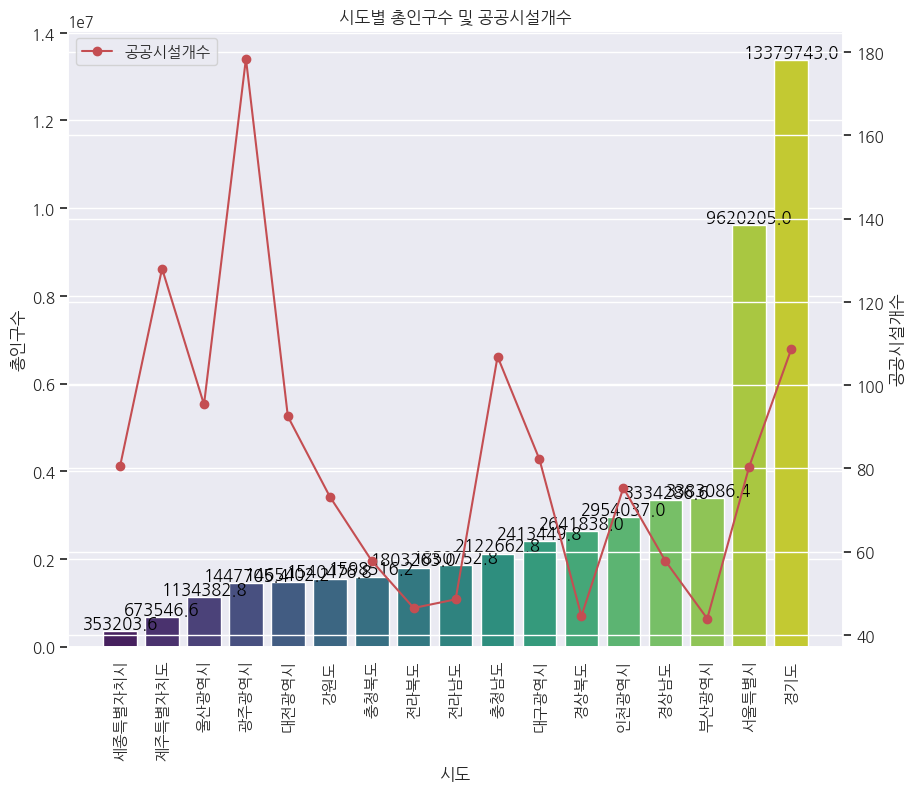

In [22]:
# '시도'별 '총인구수'과 '공공시설개수'의 평균을 계산하고 정렬
sido_summary = df.groupby('시도').agg({'총인구수':'sum', '공공시설개수':'mean'}).sort_values(by='총인구수')

# '총인구수'를 5년치로 나누어 평균을 구함
sido_summary['총인구수'] /= 5

# 막대 그래프를 그리기 위한 준비
fig, ax1 = plt.subplots(figsize=(10, 8))

# Seaborn을 사용하여 '평균연령' 막대 그래프 그리기
sns.barplot(x=sido_summary.index, y=sido_summary['총인구수'], ax=ax1, palette="viridis")


# 각 막대에 '평균연령' 값 표시
for index, value in enumerate(sido_summary['총인구수']):
    ax1.text(index, value, f'{value:.1f}', color='black', ha="center", va='bottom')

# x축 레이블 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# '공공시설개수'에 대한 선형 그래프를 위한 두 번째 y축 설정
ax2 = ax1.twinx()

# '공공시설개수' 선형 그래프 그리기
ax2.plot(sido_summary.index, sido_summary['공공시설개수'], color='r', marker='o', label='공공시설개수')

# 레이블 및 타이틀 설정
ax1.set_ylabel('총인구수')
ax1.set_xlabel('시도')
ax2.set_ylabel('공공시설개수')
plt.title('시도별 총인구수 및 공공시설개수')

# 범례 표시
ax2.legend(loc='upper left')

# 그래프 표시
plt.show()


### **[그래프 해석]**

**총인구수**
    - 경기도(13379743) → 서울특별시(9620205) → 부산광역시(3383086) → 경상남도(3334286) → 인천광역시(2954037)
    
**공공시설개수**  
    - 광주광역시(178) → 제주특별자치도(128) → 경기도(109) → 충청남도(107) → 울산광역시(95)순으로 많다.


In [157]:
sido_summary['총인구수'].sort_values(ascending = False)

시도
경기도        13379743.0
서울특별시       9620205.0
부산광역시       3383086.4
경상남도        3334286.6
인천광역시       2954037.0
경상북도        2641838.0
대구광역시       2413449.8
충청남도        2122662.8
전라남도        1850752.8
전라북도        1803263.0
충청북도        1598516.2
강원도         1540476.8
대전광역시       1465402.2
광주광역시       1447705.4
울산광역시       1134382.8
제주특별자치도      673546.6
세종특별자치시      353203.6
Name: 총인구수, dtype: float64

In [155]:
sido_summary['공공시설개수'].sort_values(ascending = False)

시도
광주광역시      178.440000
제주특별자치도    128.000000
경기도        108.576190
충청남도       106.875000
울산광역시       95.360000
대전광역시       92.480000
대구광역시       82.150000
세종특별자치시     80.600000
서울특별시       80.424000
인천광역시       75.340000
강원도         73.233333
충청북도        57.800000
경상남도        57.800000
전라남도        48.554545
전라북도        46.480000
경상북도        44.550000
부산광역시       43.925000
Name: 공공시설개수, dtype: float64

In [23]:
import plotly.graph_objects as go

# '시도'별 '평균연령'과 '고용률'의 평균을 계산하고 '평균연령' 기준으로 오름차순 정렬
sido_summary = df.groupby('시도').agg({'평균연령':'mean', '고용률':'max'}).sort_values(by='평균연령')

# 막대 그래프를 위한 Trace 생성
bar_trace = go.Bar(
    x=sido_summary.index, 
    y=sido_summary['평균연령'], 
    text=sido_summary['평균연령'].round(1).astype(str),
    textposition='outside',
    marker=dict(color=sido_summary['평균연령'], colorscale='Viridis'),
    name='평균연령'
)

# 선형 그래프를 위한 Trace 생성
line_trace = go.Scatter(
    x=sido_summary.index, 
    y=sido_summary['고용률'], 
    mode='lines+markers+text',
    text=sido_summary['고용률'].round(1).astype(str),
    textposition='top center',
    line=dict(color='rgb(214,39,40)'),
    name='고용률'
)

# 레이아웃 설정
layout = go.Layout(
    title='시도별 평균연령 및 고용률',
    xaxis=dict(title='시도'),
    yaxis=dict(title='평균연령'),
    yaxis2=dict(title='고용률', overlaying='y', side='right'),
    template="plotly_white"
)

# Figure 생성 및 표시
fig = go.Figure(data=[bar_trace, line_trace], layout=layout)
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()


### **[그래프 해석]**

**평균연령**  
    - 경상북도(50.2) → 전라남도(50.0) → 전라북도(49.3) → 강원도(47.8) → 경상남도(47.8) 순으로 높다.
    
**고용률**  
    - 제주특별자치도(68.6) → 전라남도(67.5) → 경상북도(65.9) → 충청남도(65.7) → 전라북도(65.2) 순으로 높다

In [160]:
sido_summary['평균연령'].sort_values(ascending = False)

시도
경상북도       50.165833
전라남도       49.997273
전라북도       49.320000
강원도        47.806667
경상남도       47.763636
충청남도       47.321250
충청북도       46.770000
부산광역시      45.545000
인천광역시      44.264000
대구광역시      44.197500
서울특별시      43.376800
제주특별자치도    43.130000
대전광역시      42.504000
경기도        42.287143
광주광역시      42.108000
울산광역시      41.528000
세종특별자치시    37.340000
Name: 평균연령, dtype: float64

In [162]:
df['고용률'].sort_values(ascending = False)

475     84.60
225     84.10
975     84.00
1225    83.05
725     83.00
        ...  
1028    49.65
781     49.60
794     49.50
777     49.40
778     46.35
Name: 고용률, Length: 1250, dtype: float64

In [164]:
sido_summary['고용률'].sort_values(ascending = False)

시도
제주특별자치도    69.000
전라남도       67.600
강원도        65.925
전라북도       65.500
충청남도       64.975
경상북도       63.775
충청북도       63.550
세종특별자치시    62.600
인천광역시      61.975
경상남도       60.925
대전광역시      59.750
경기도        59.400
서울특별시      59.300
광주광역시      59.300
울산광역시      58.800
대구광역시      56.600
부산광역시      55.600
Name: 고용률, dtype: float64

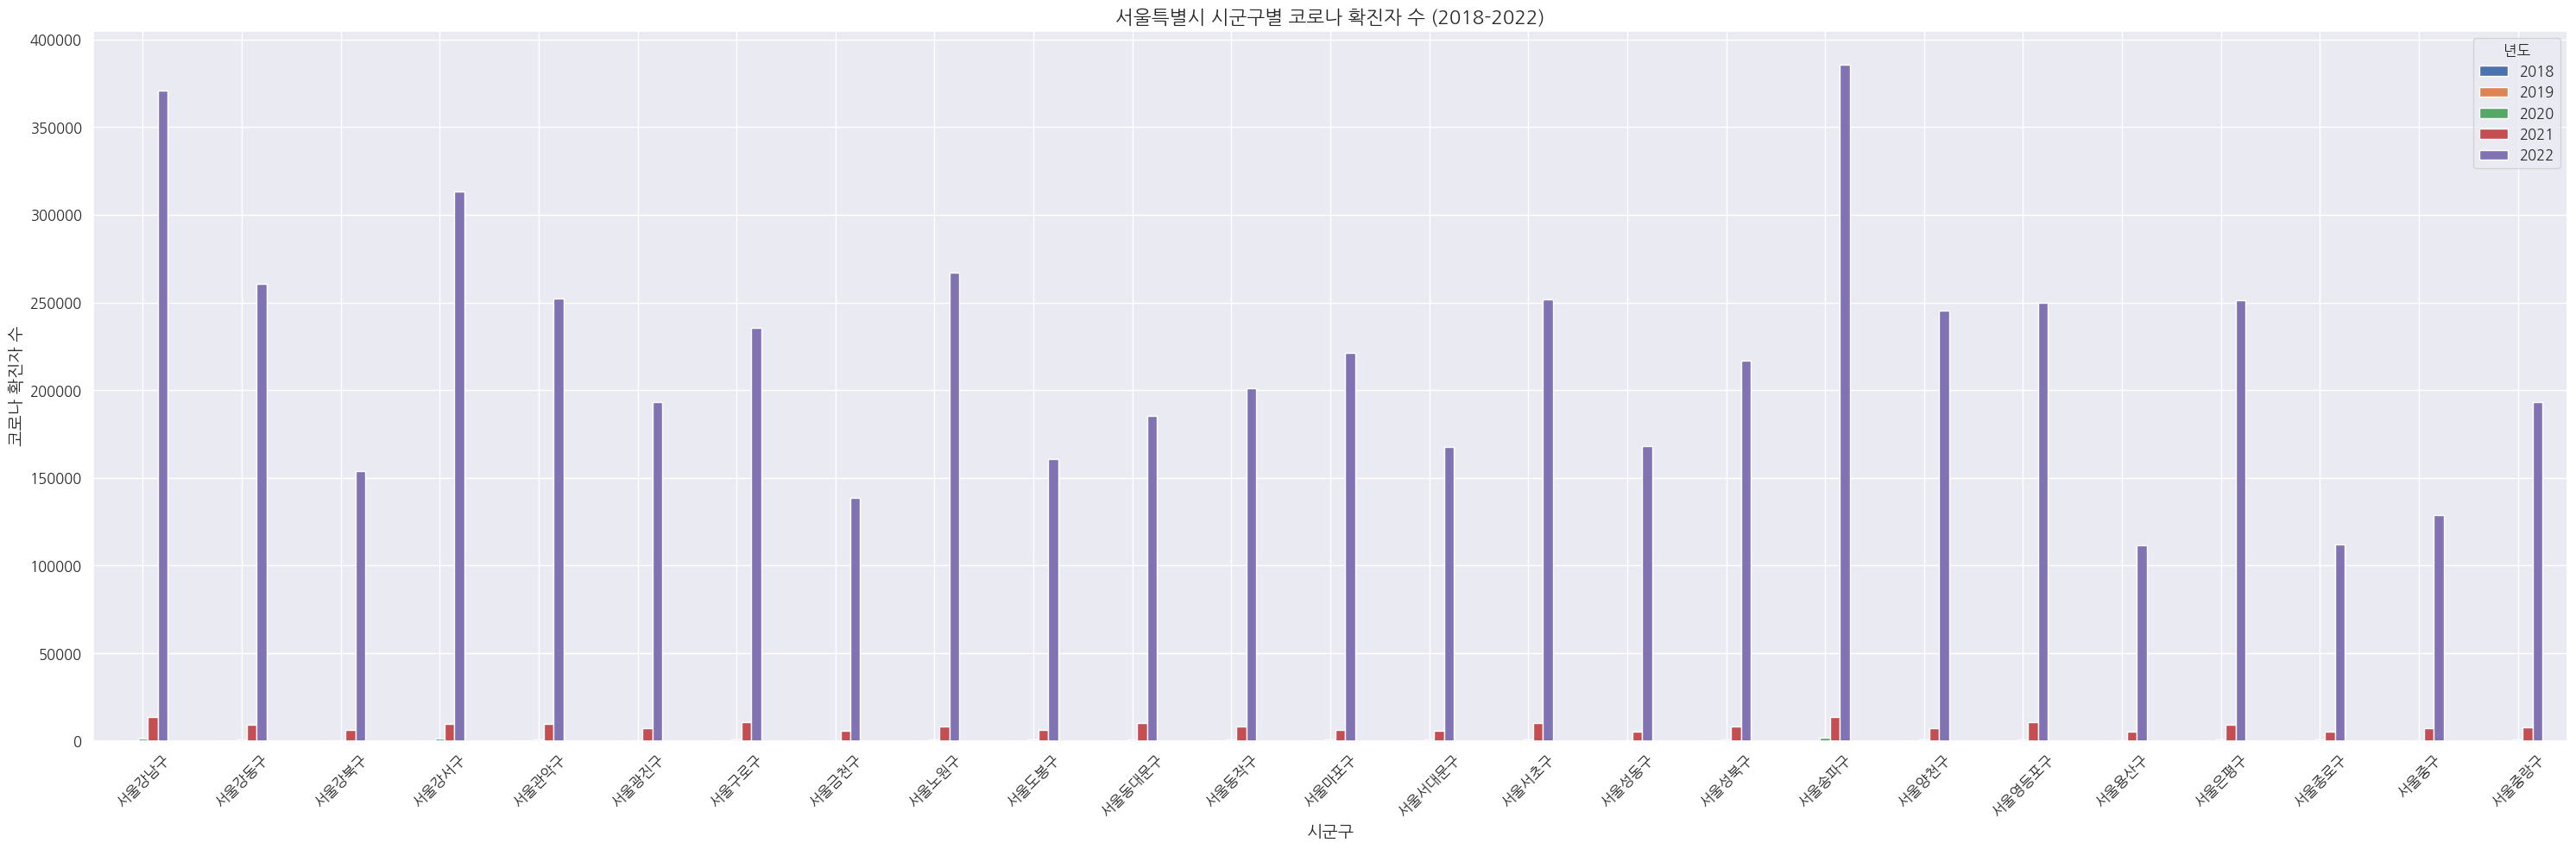

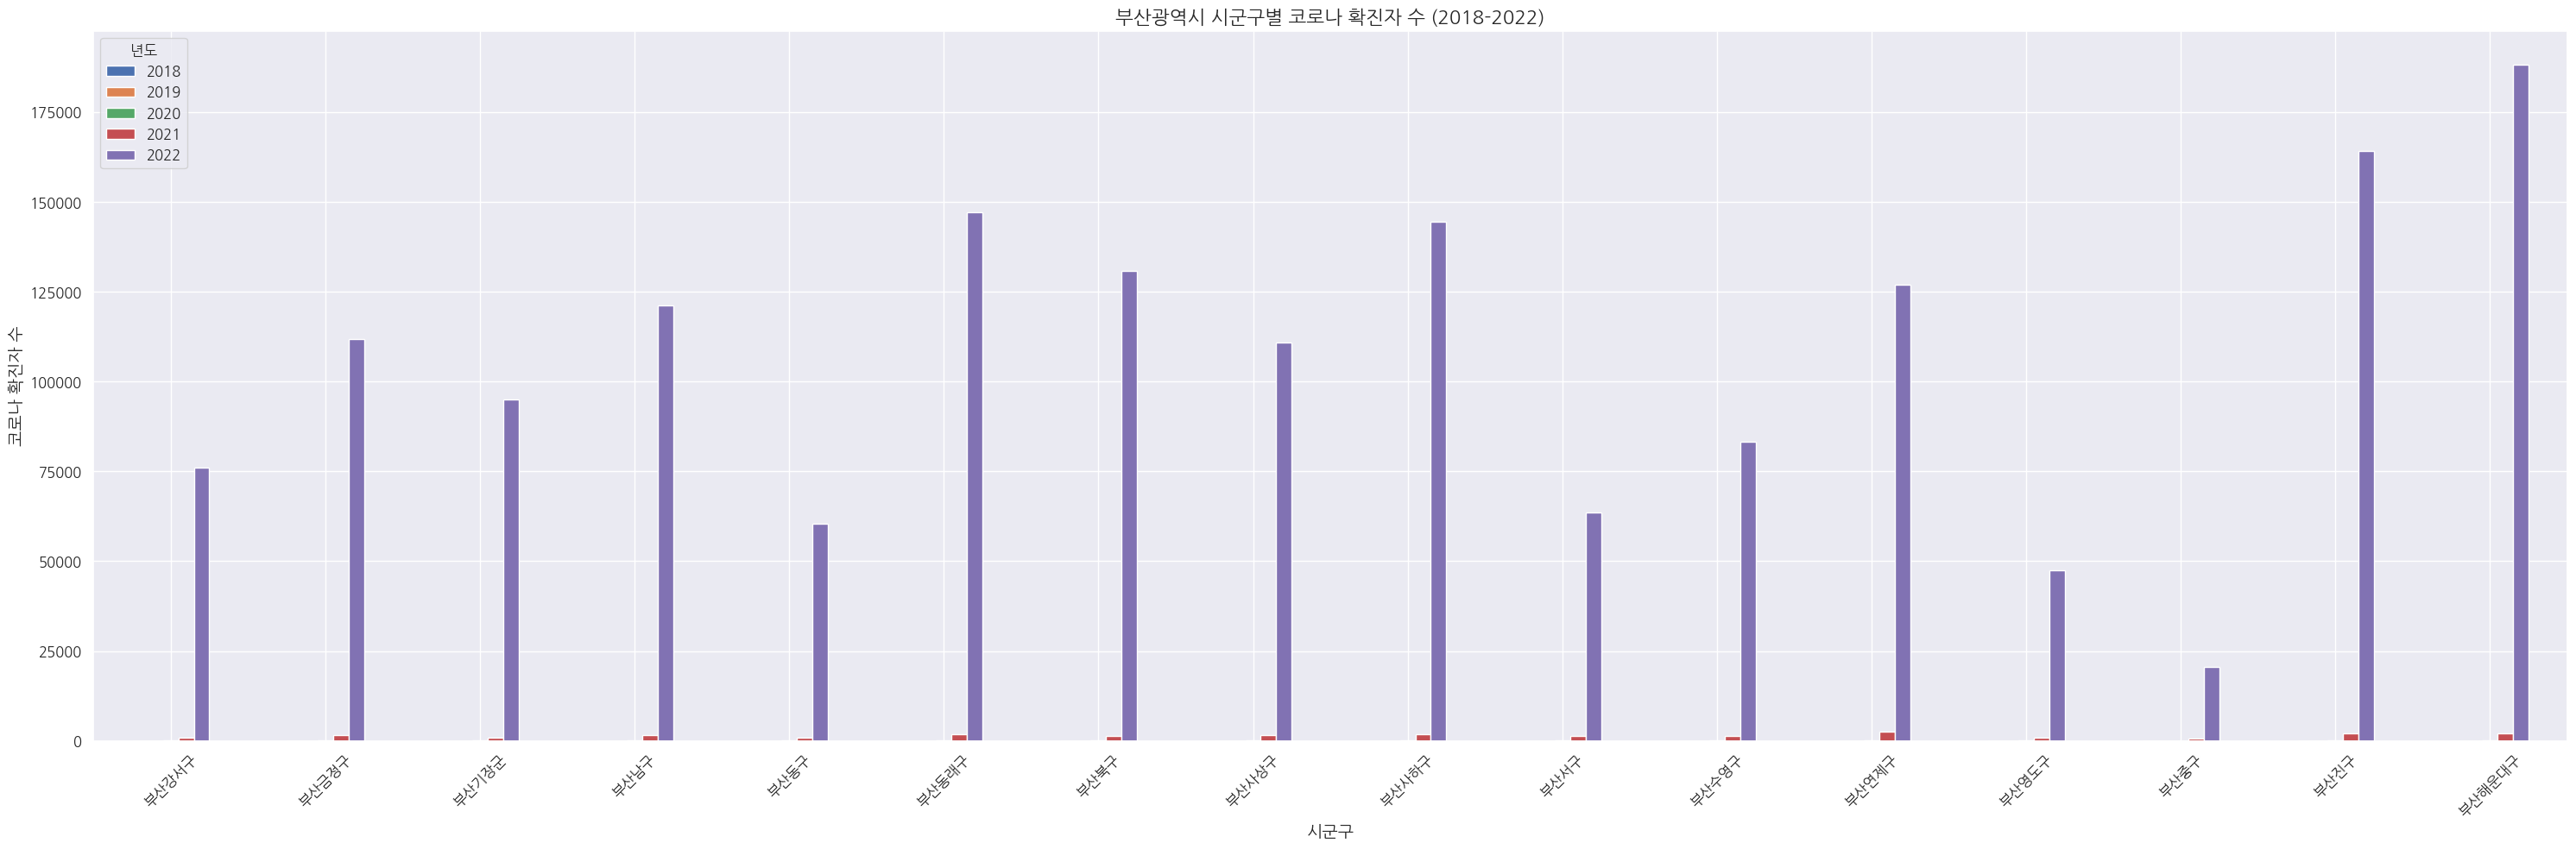

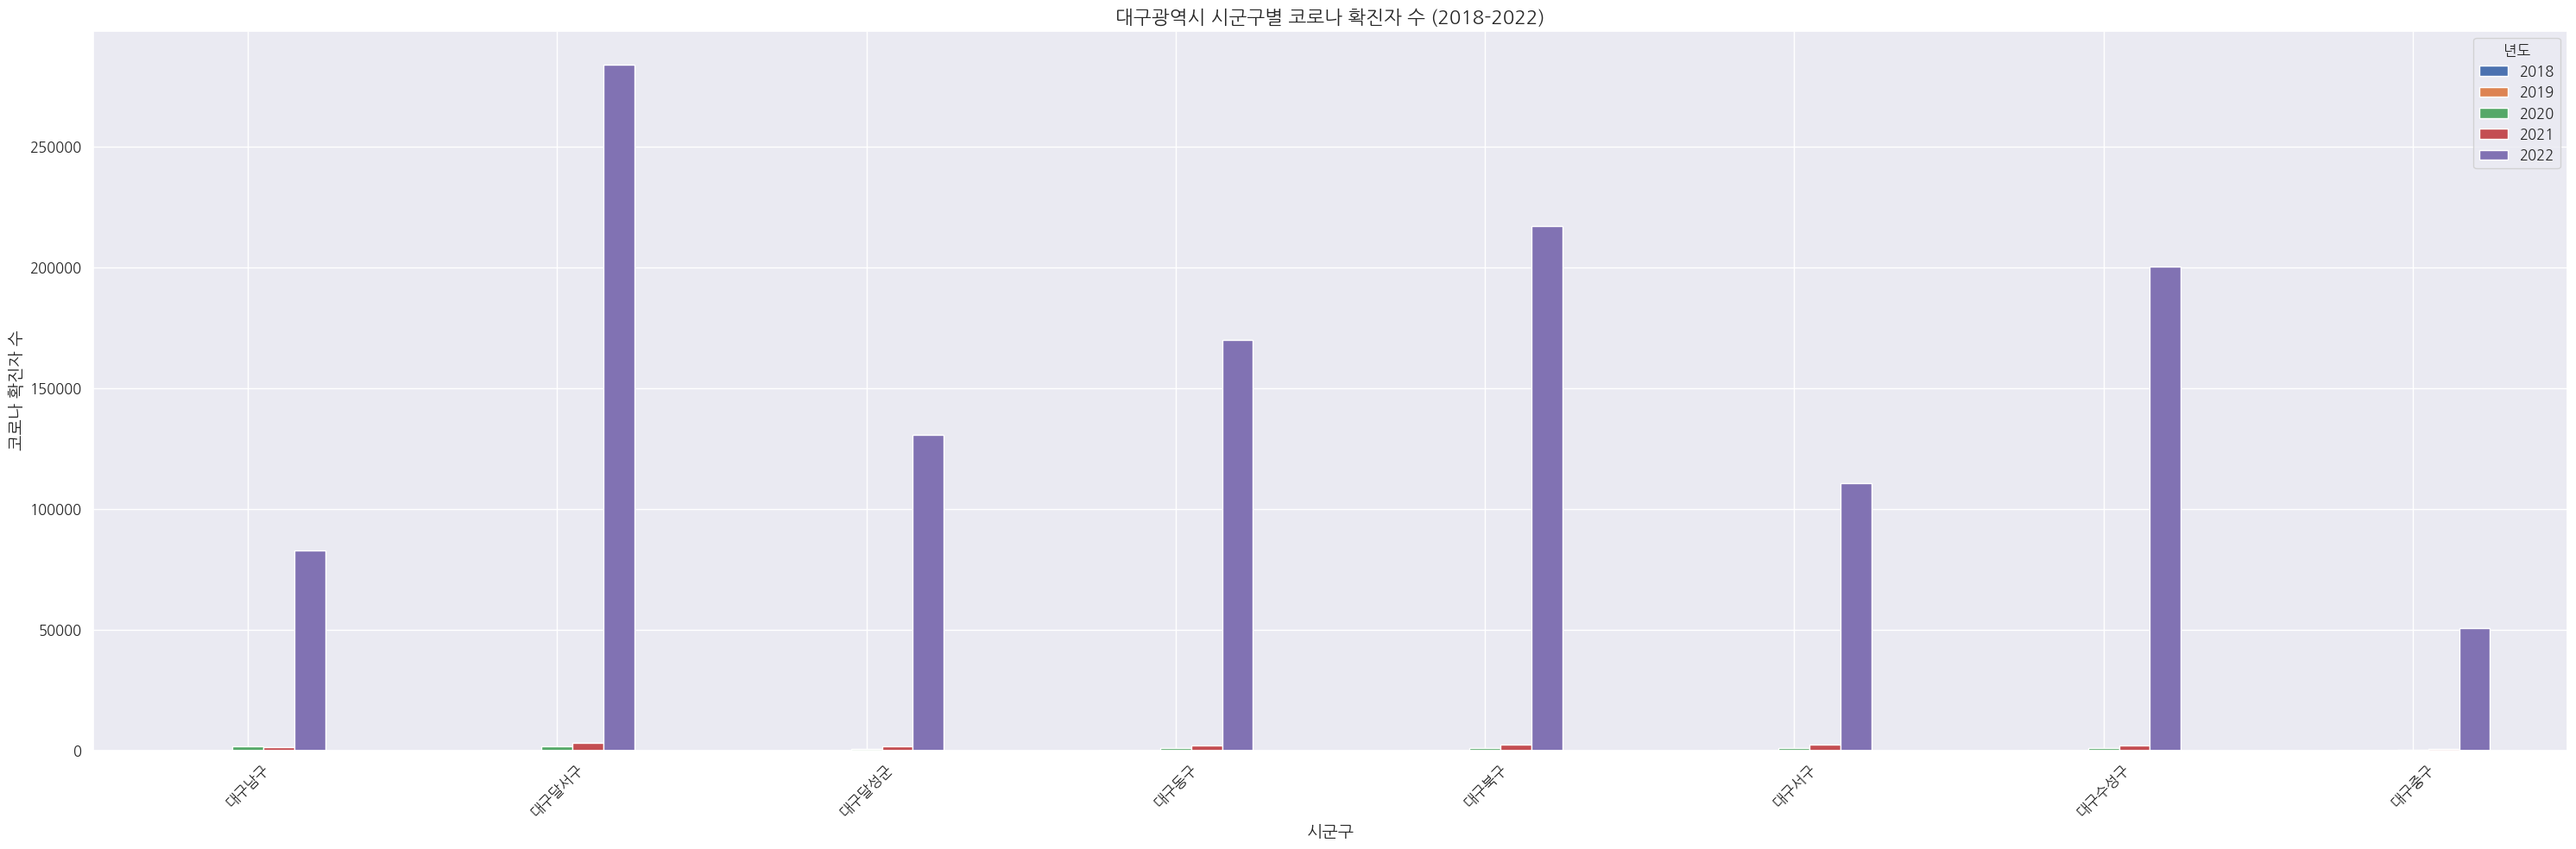

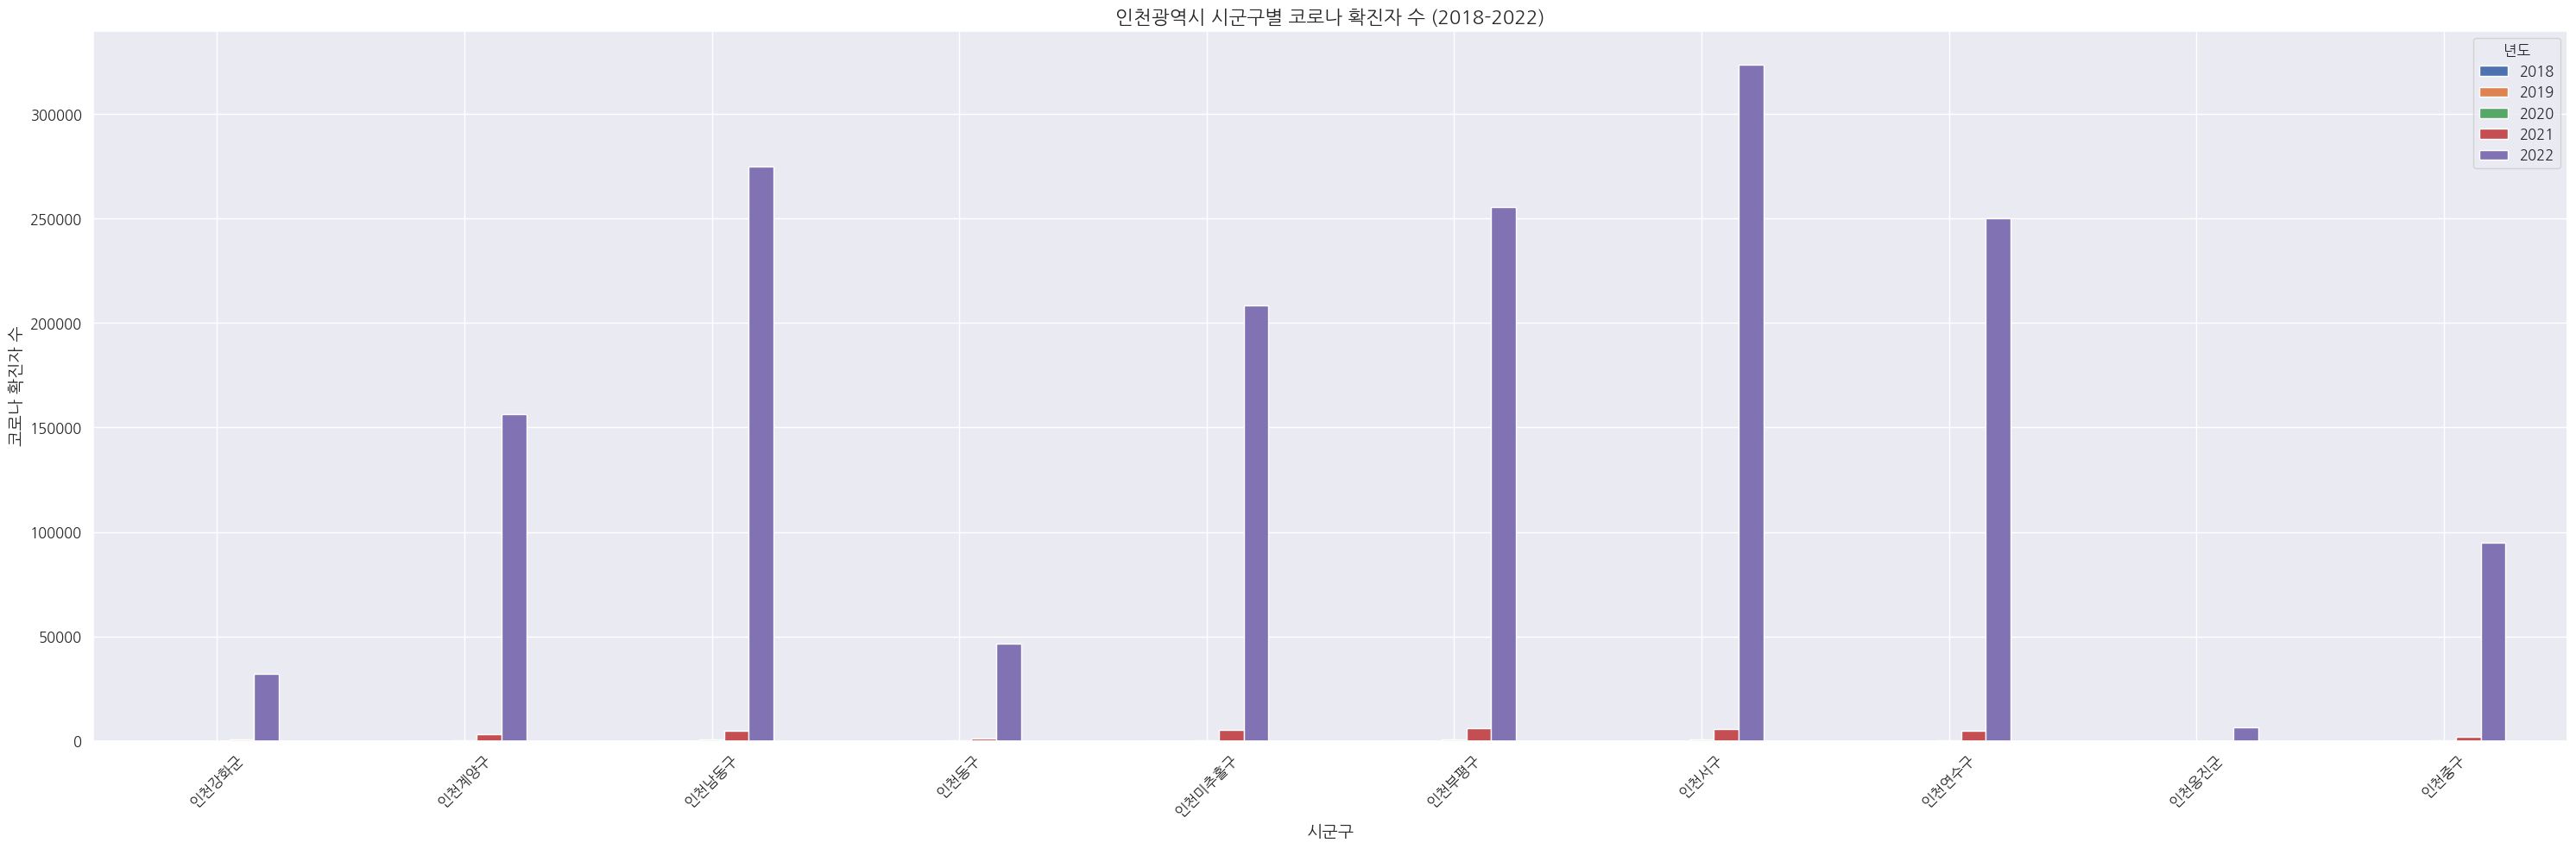

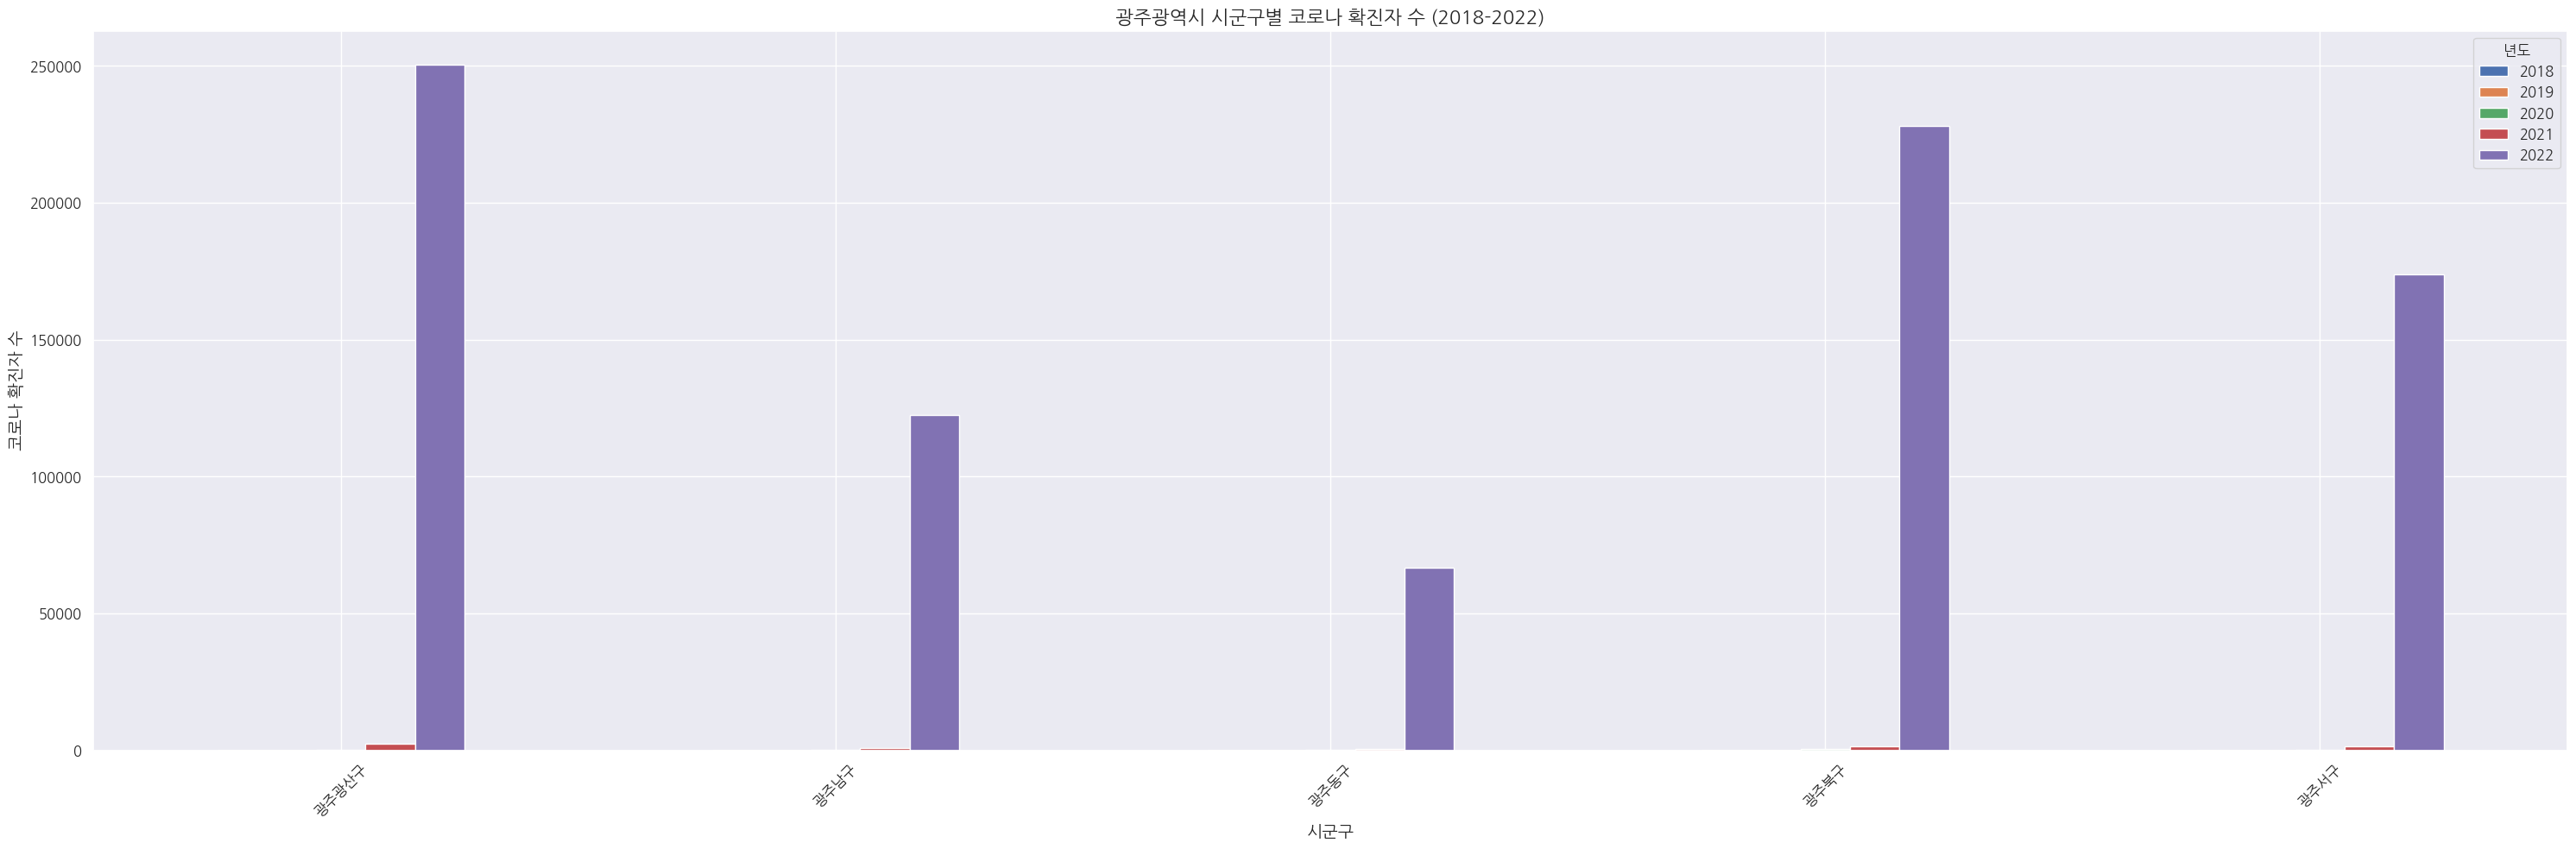

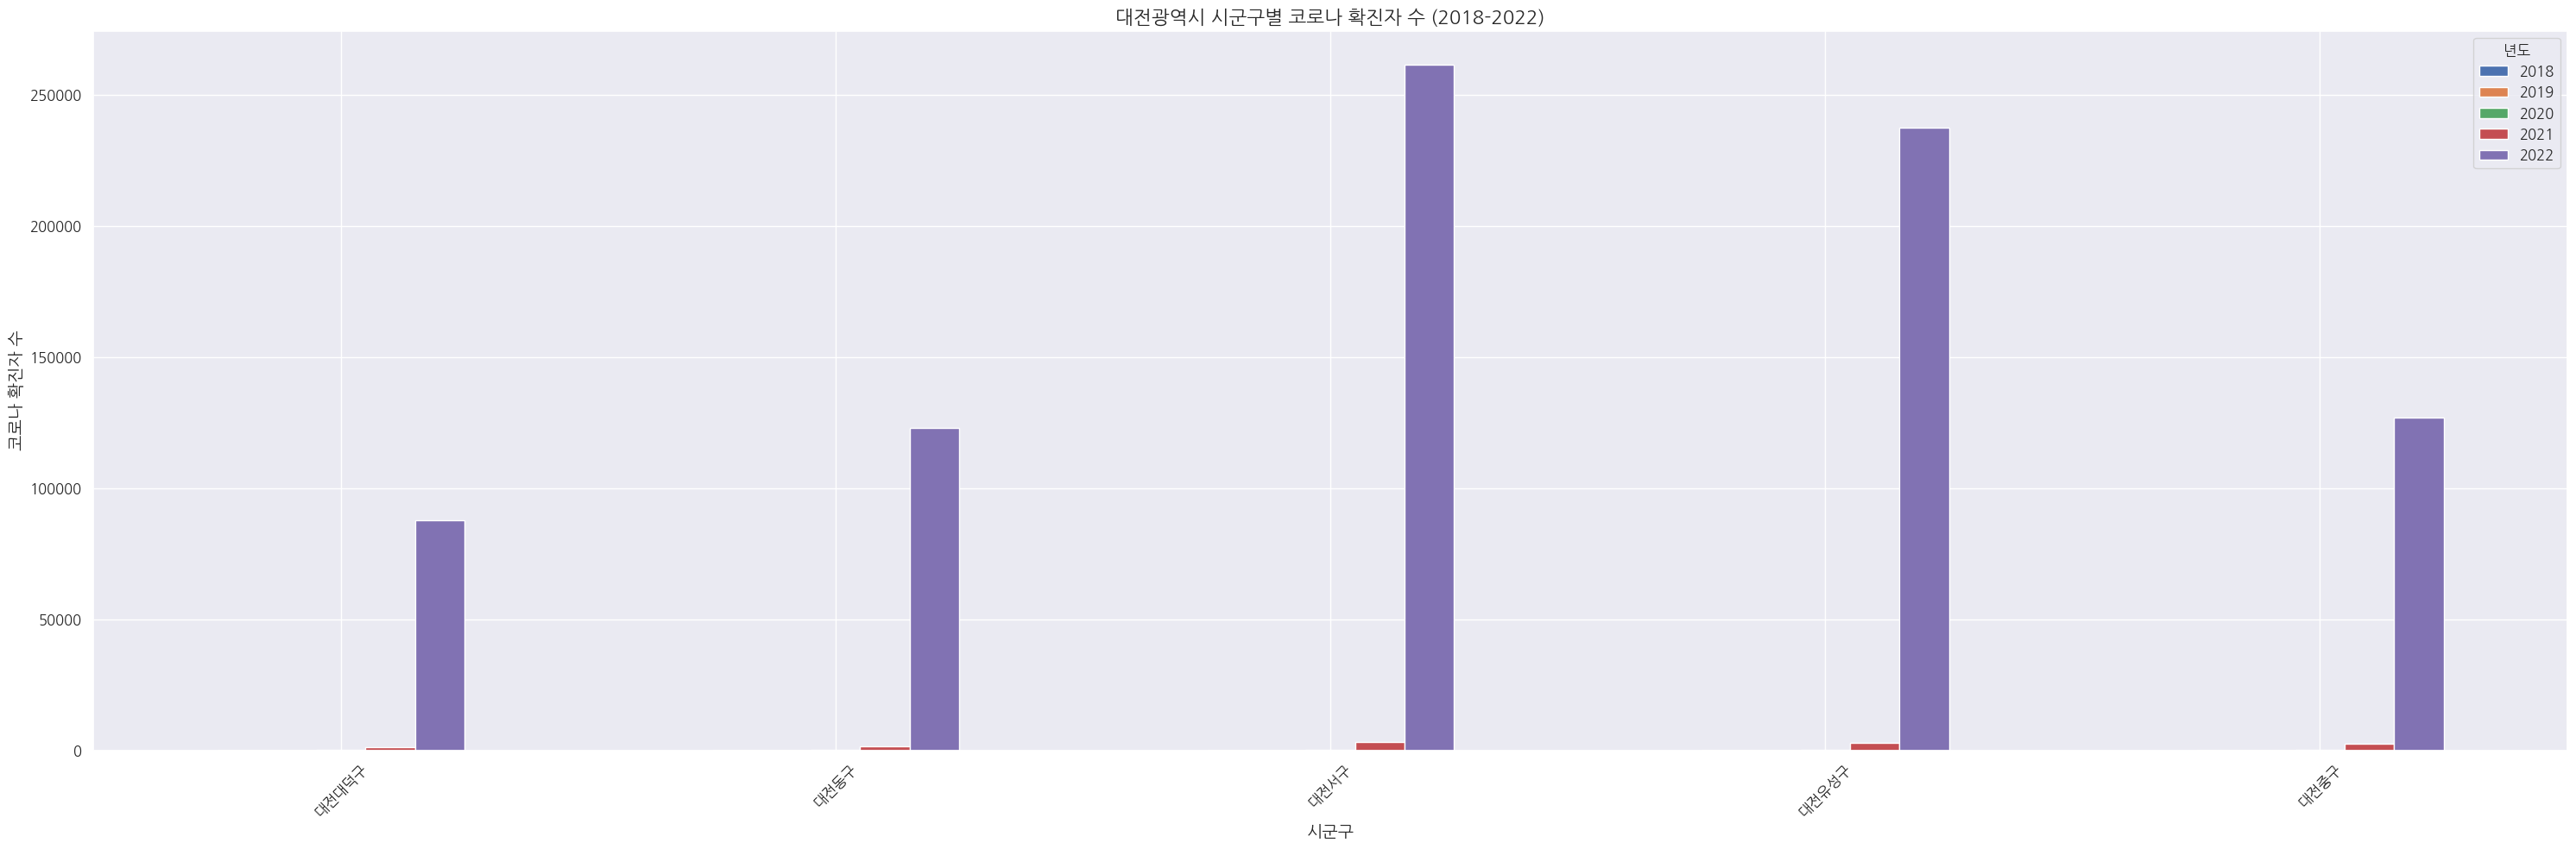

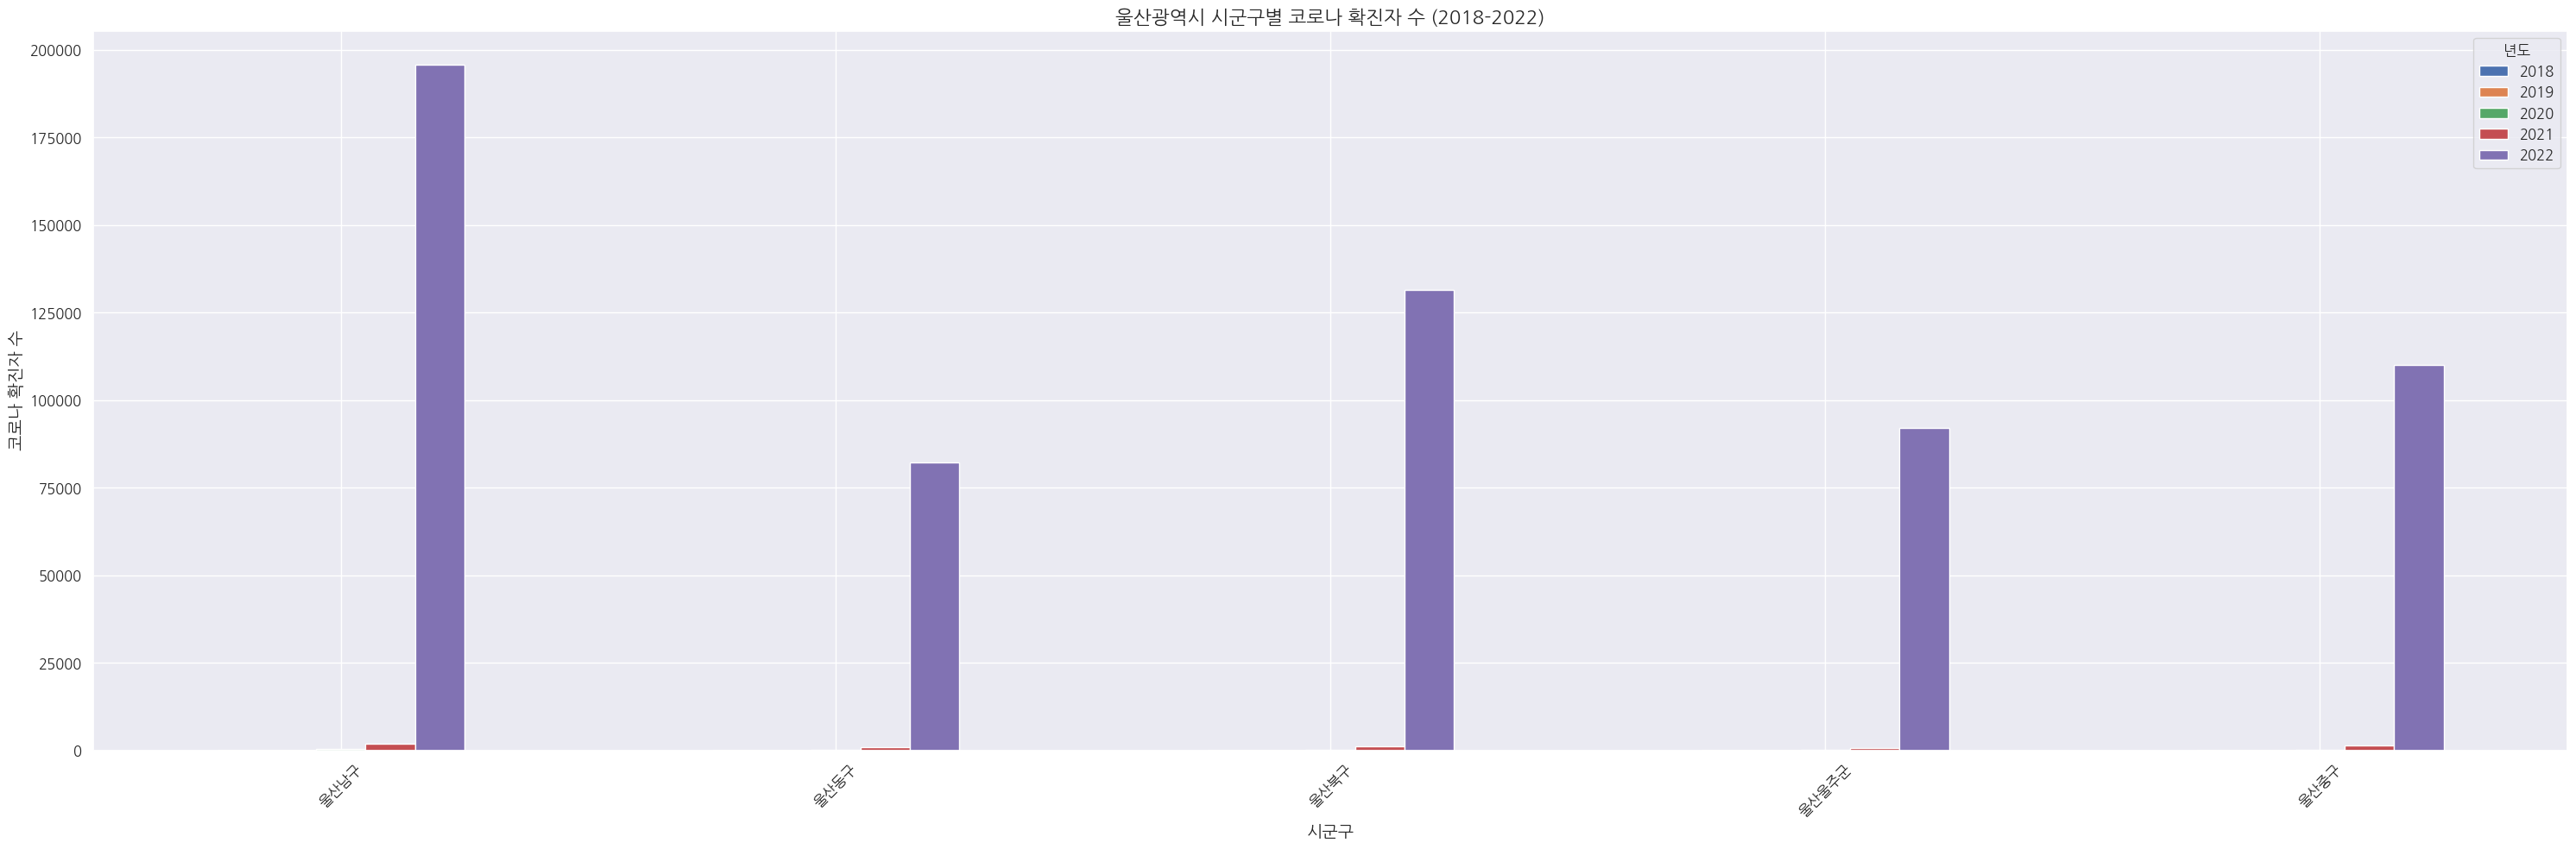

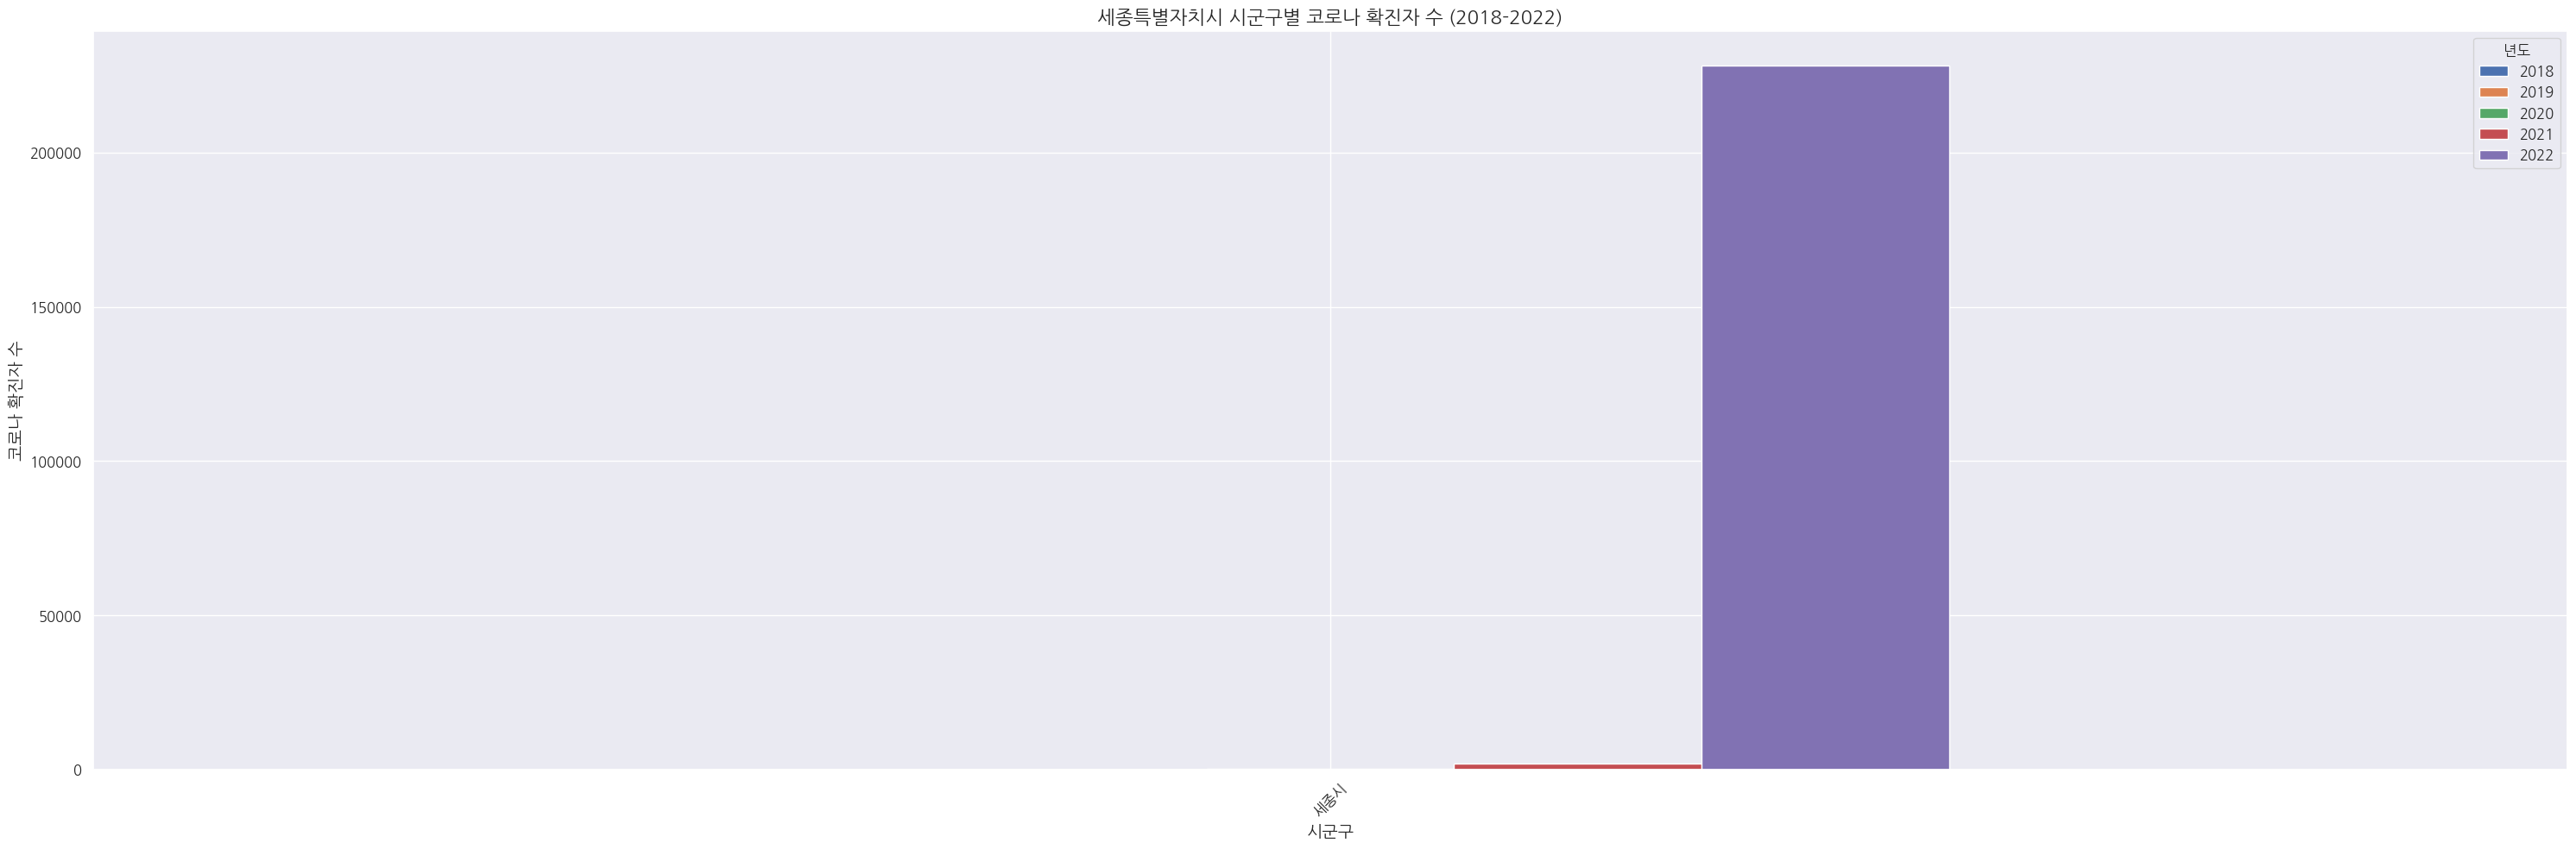

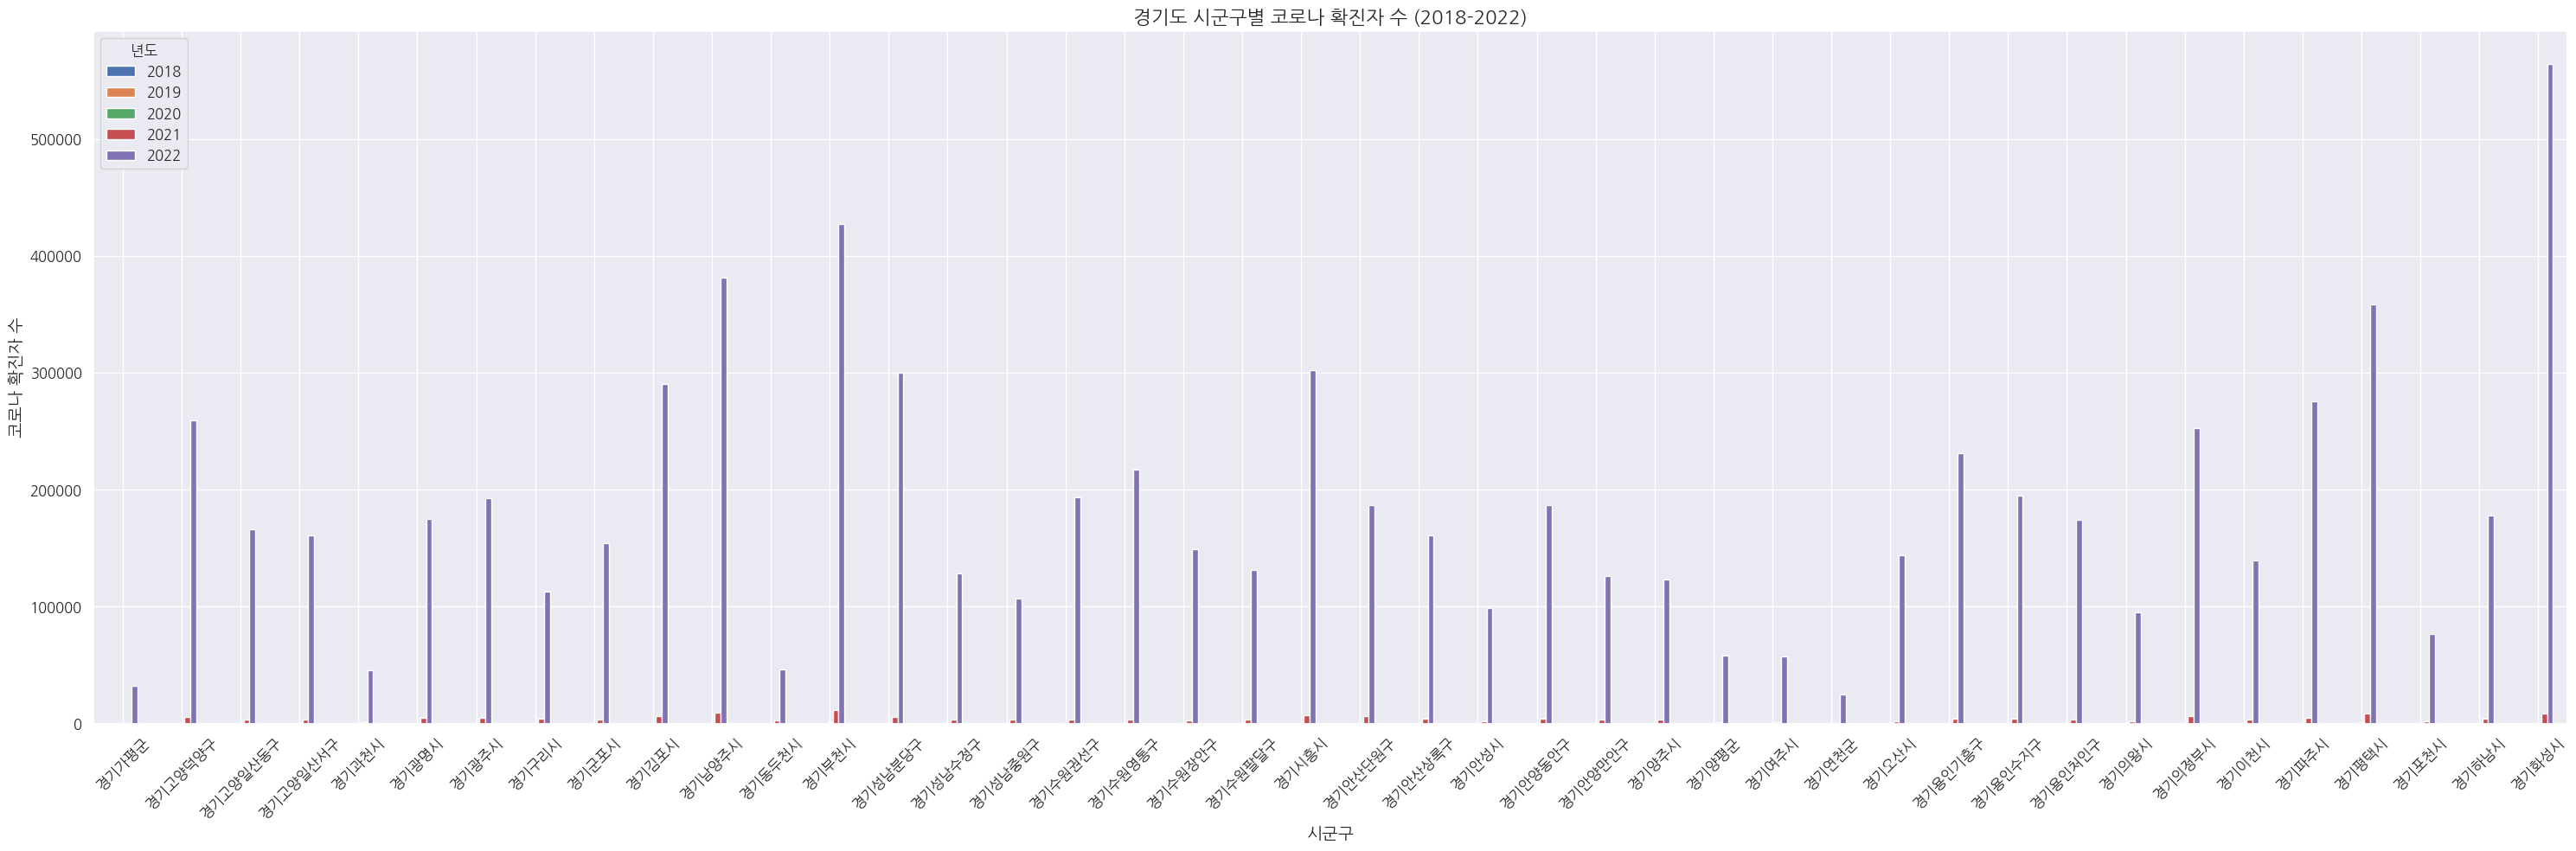

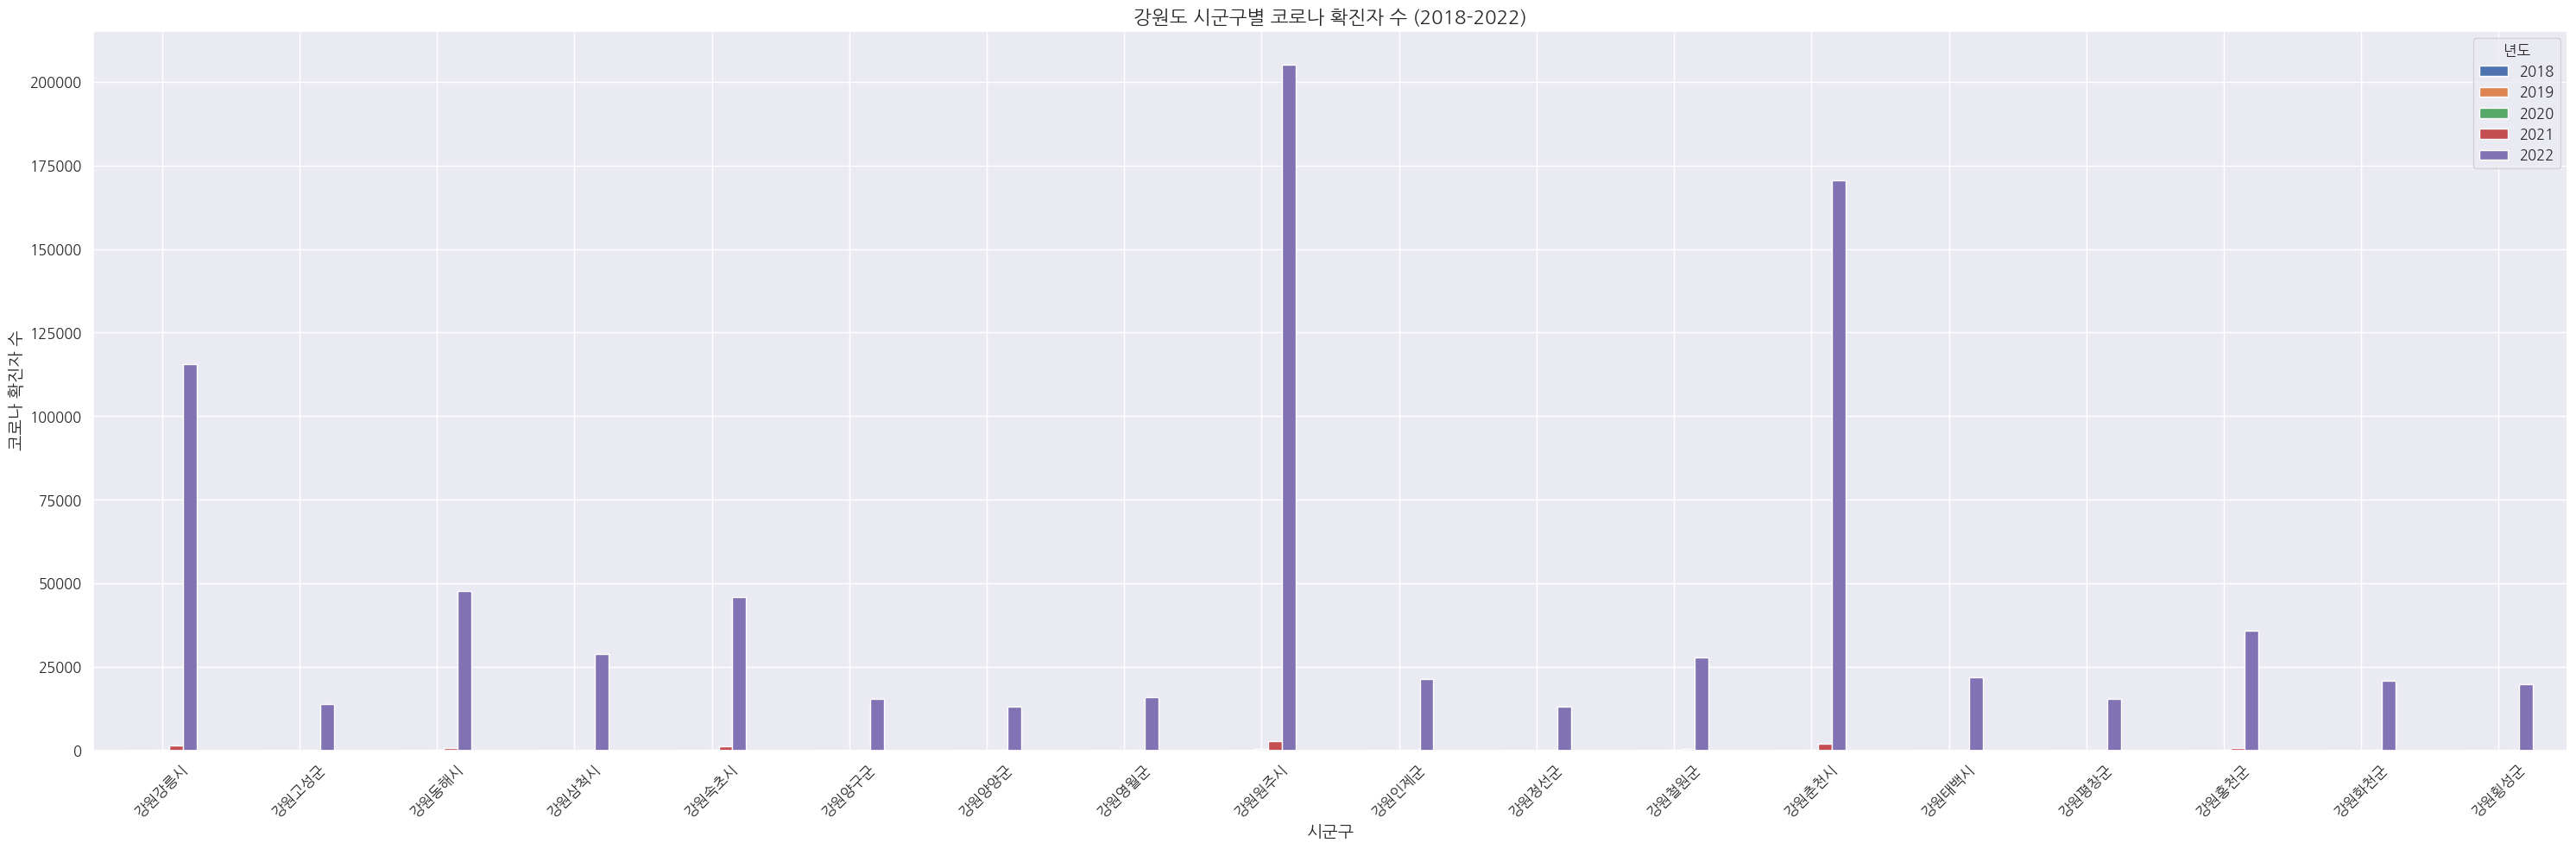

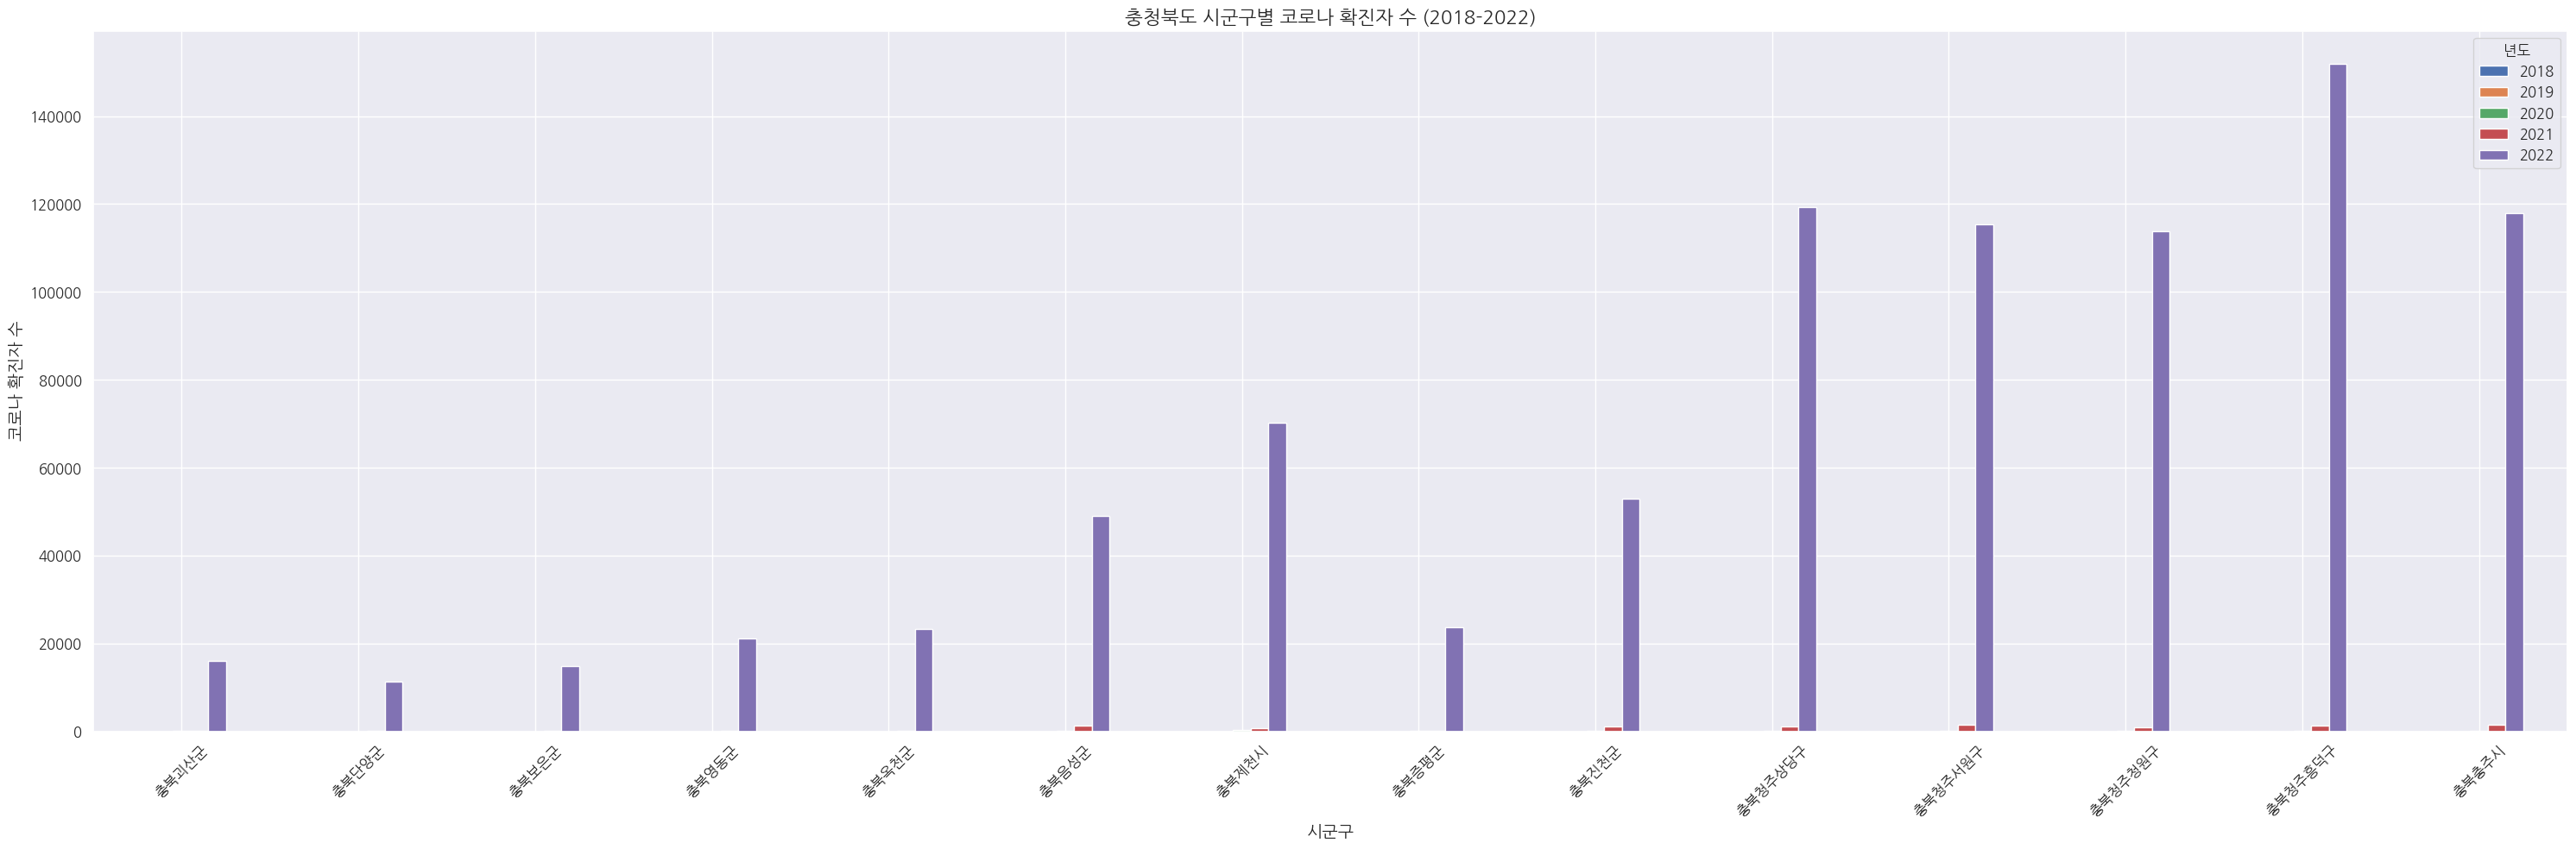

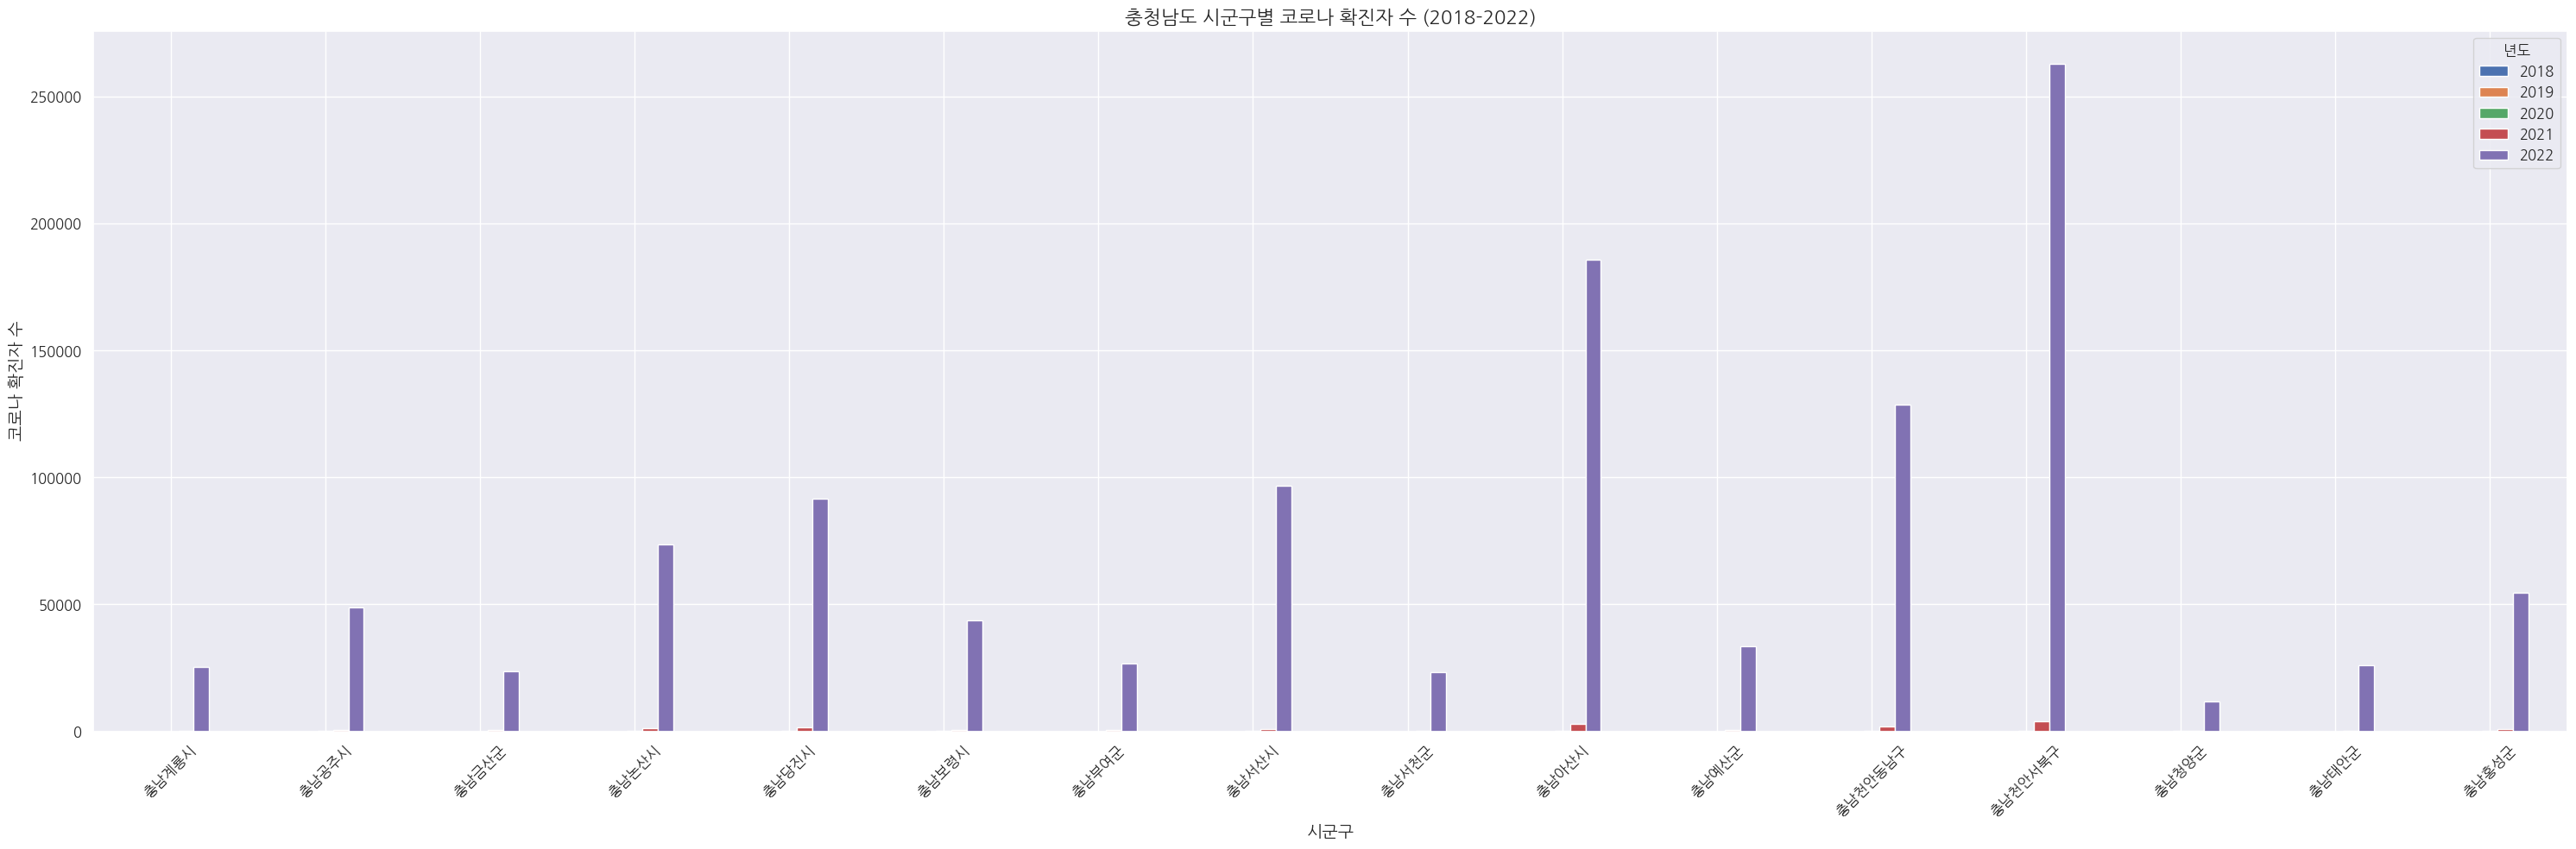

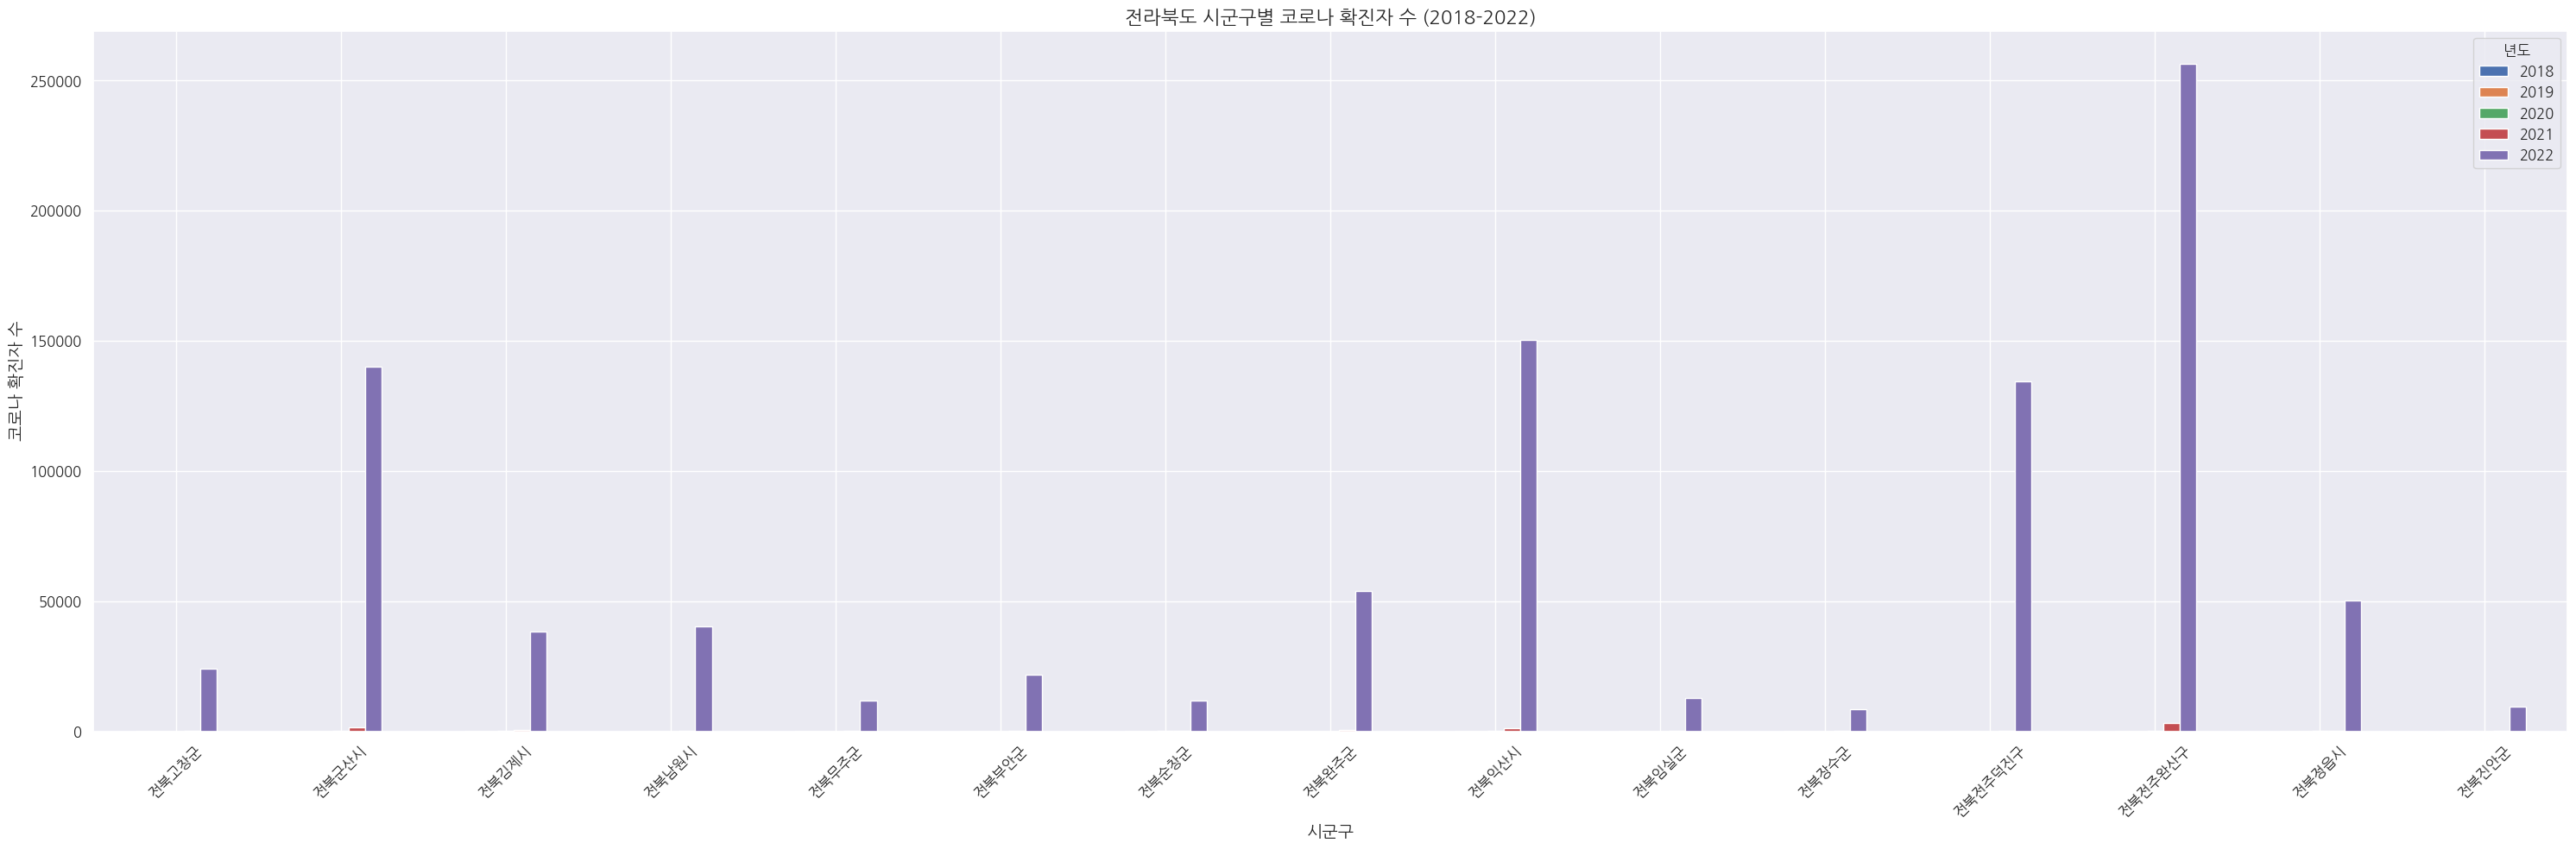

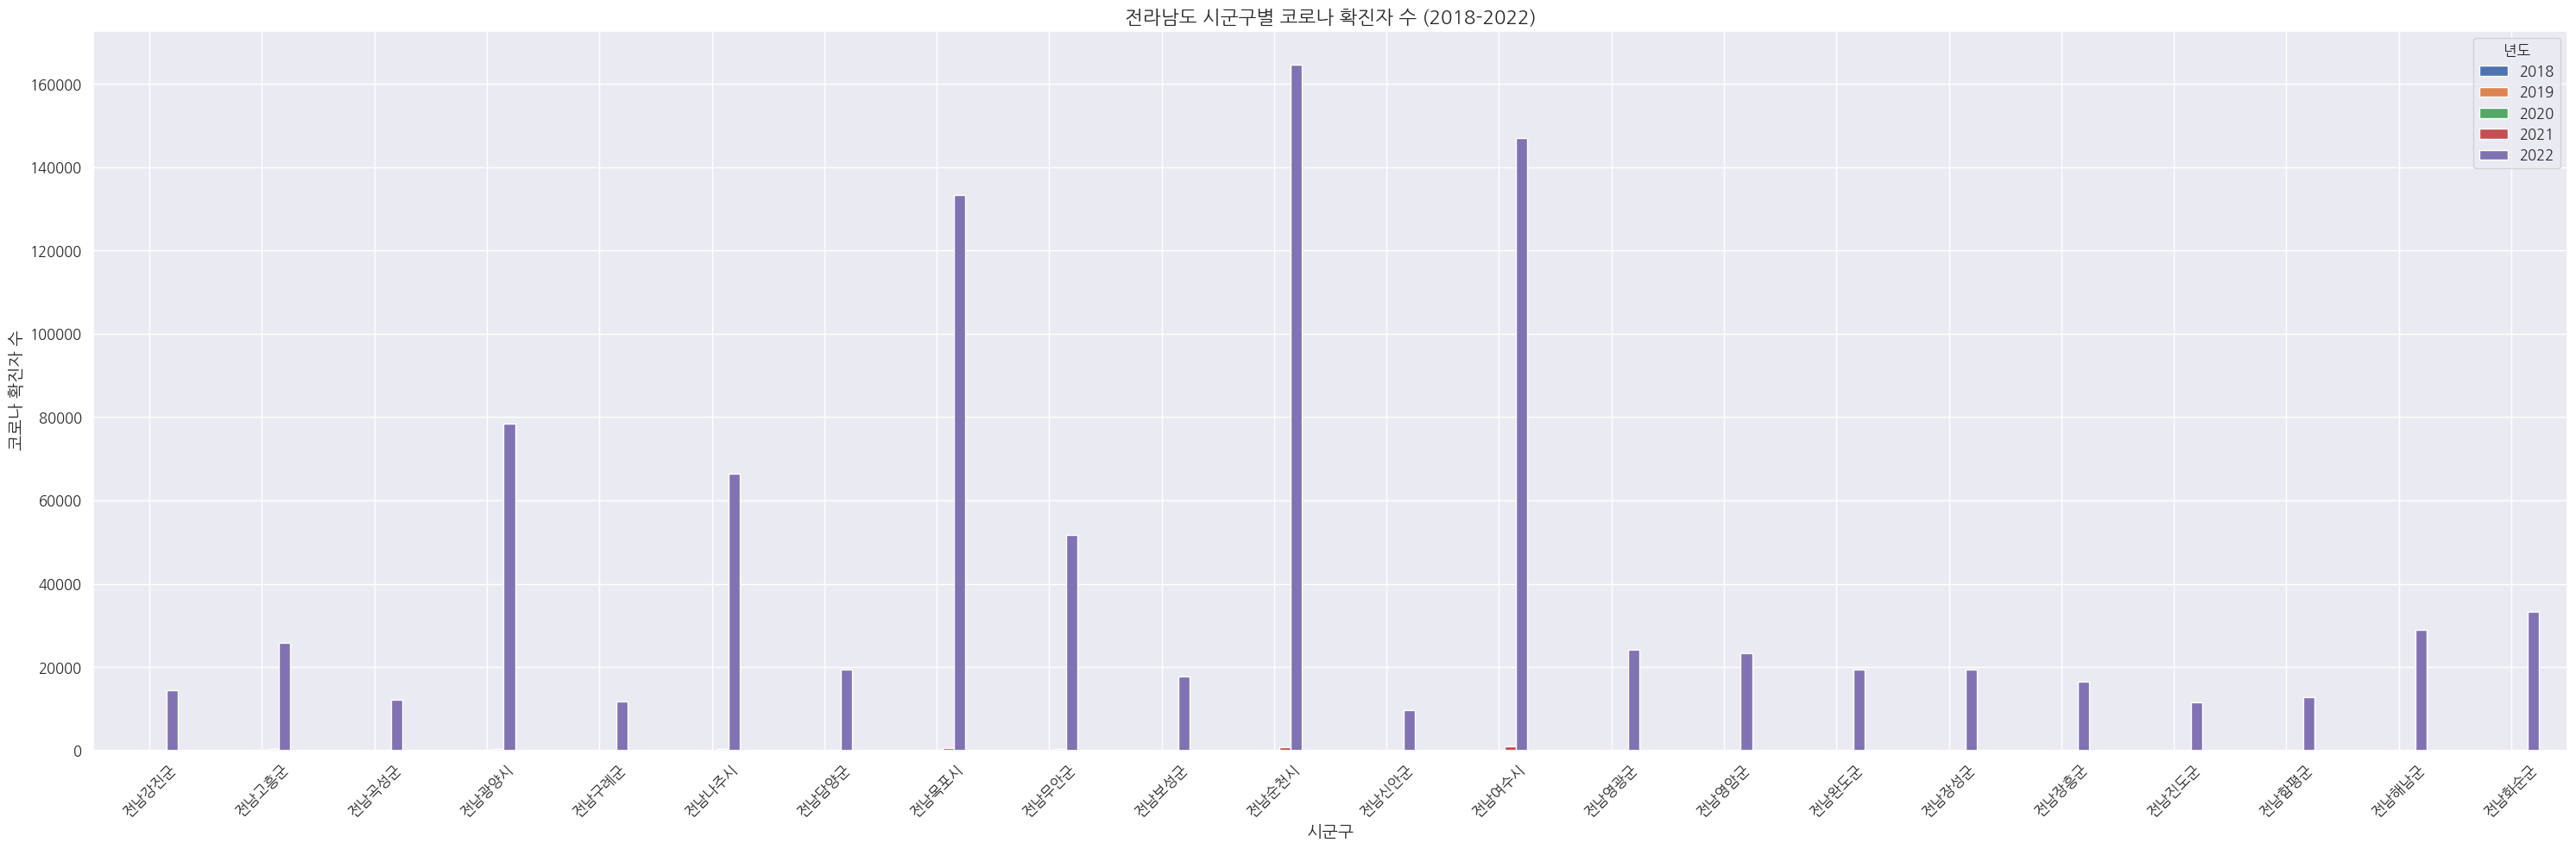

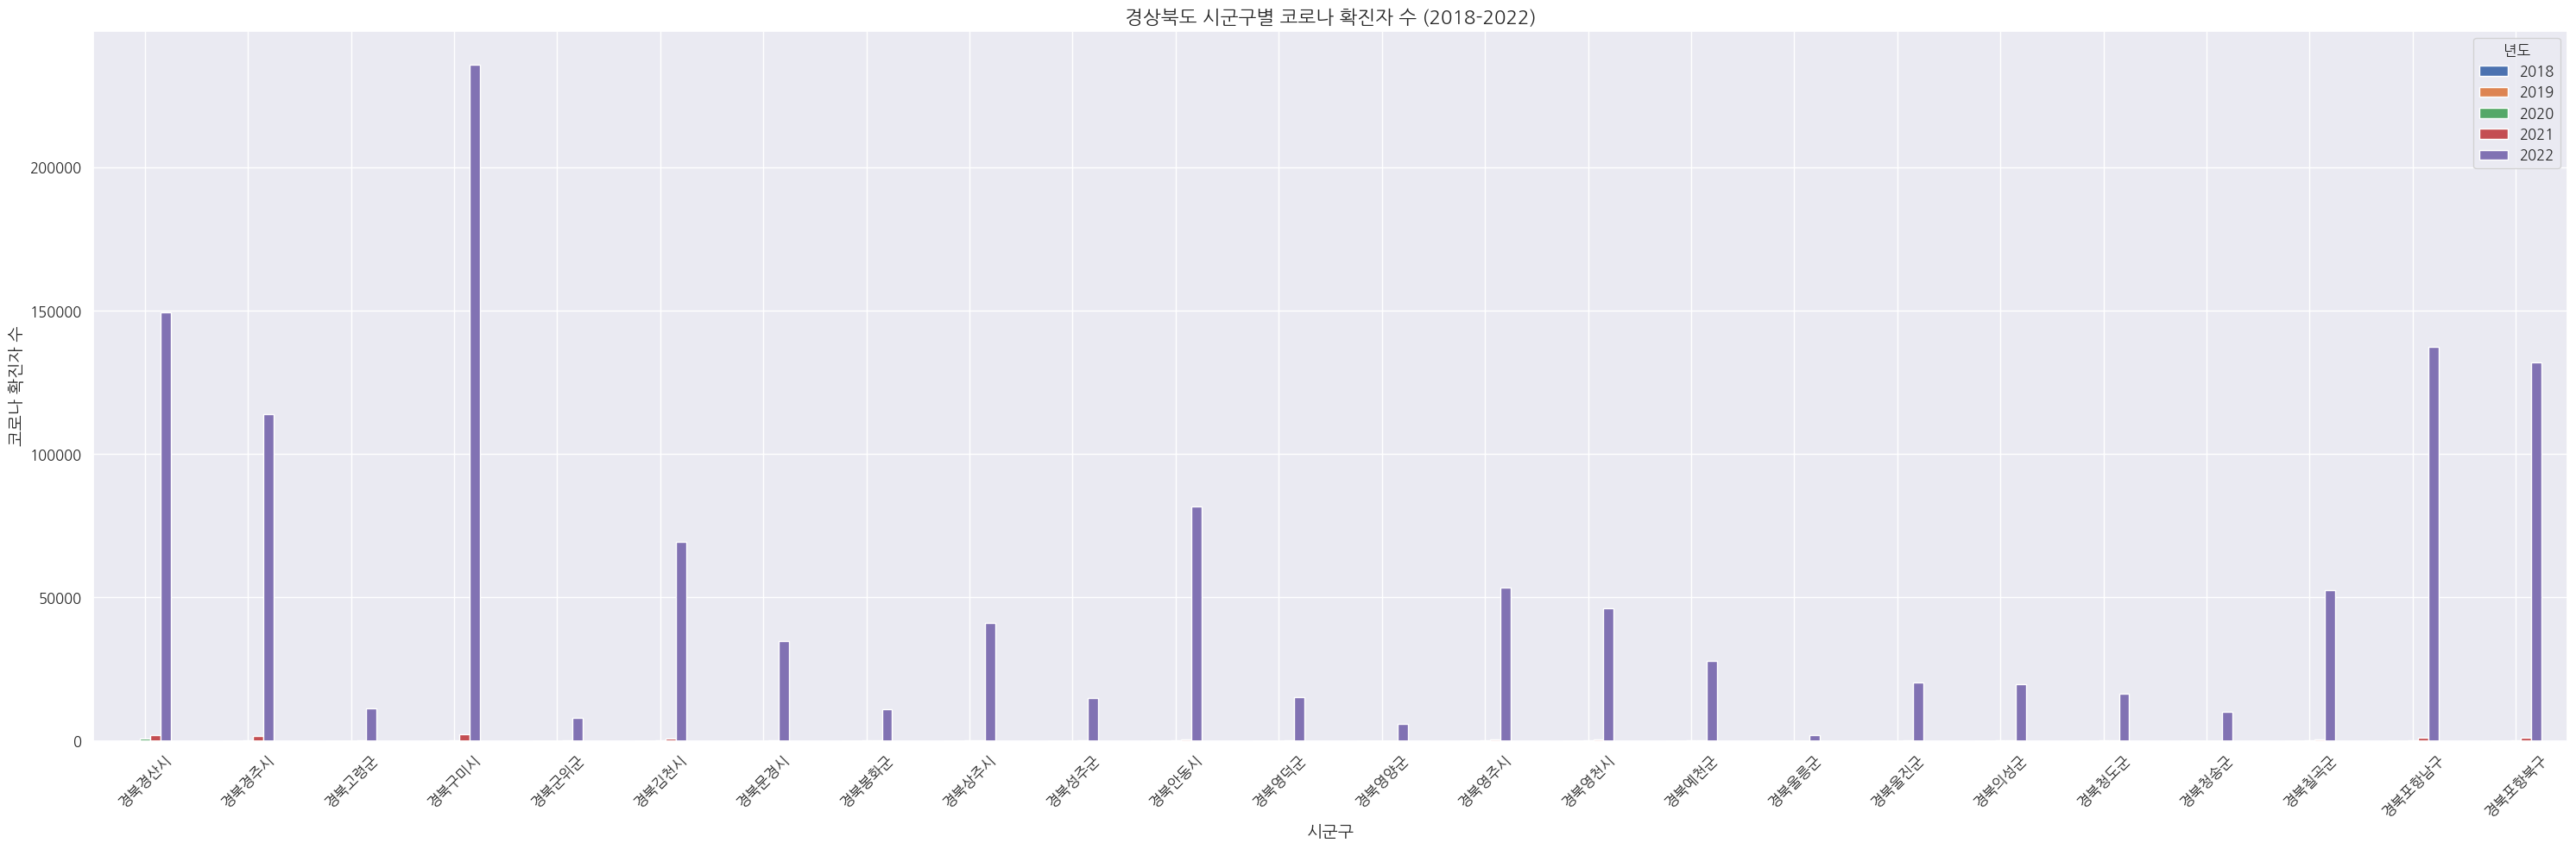

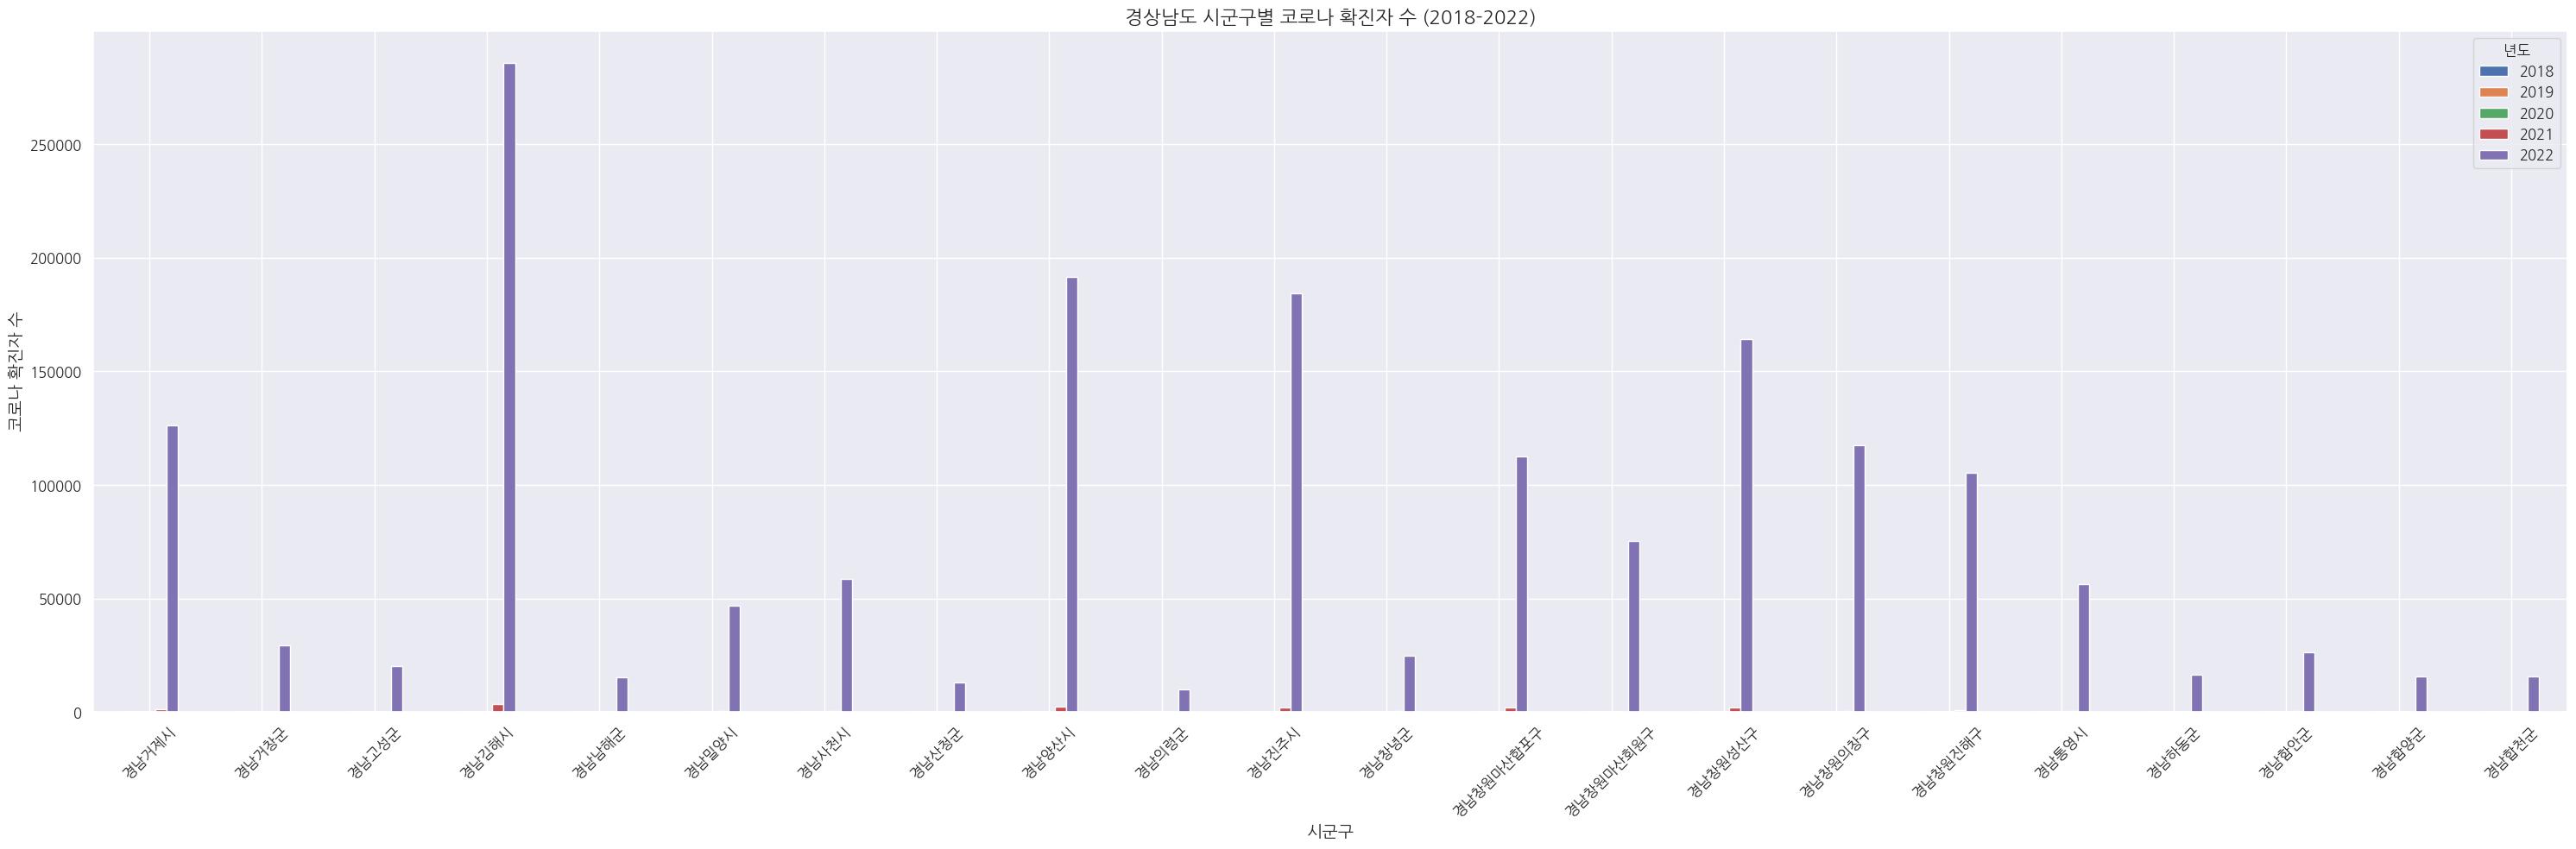

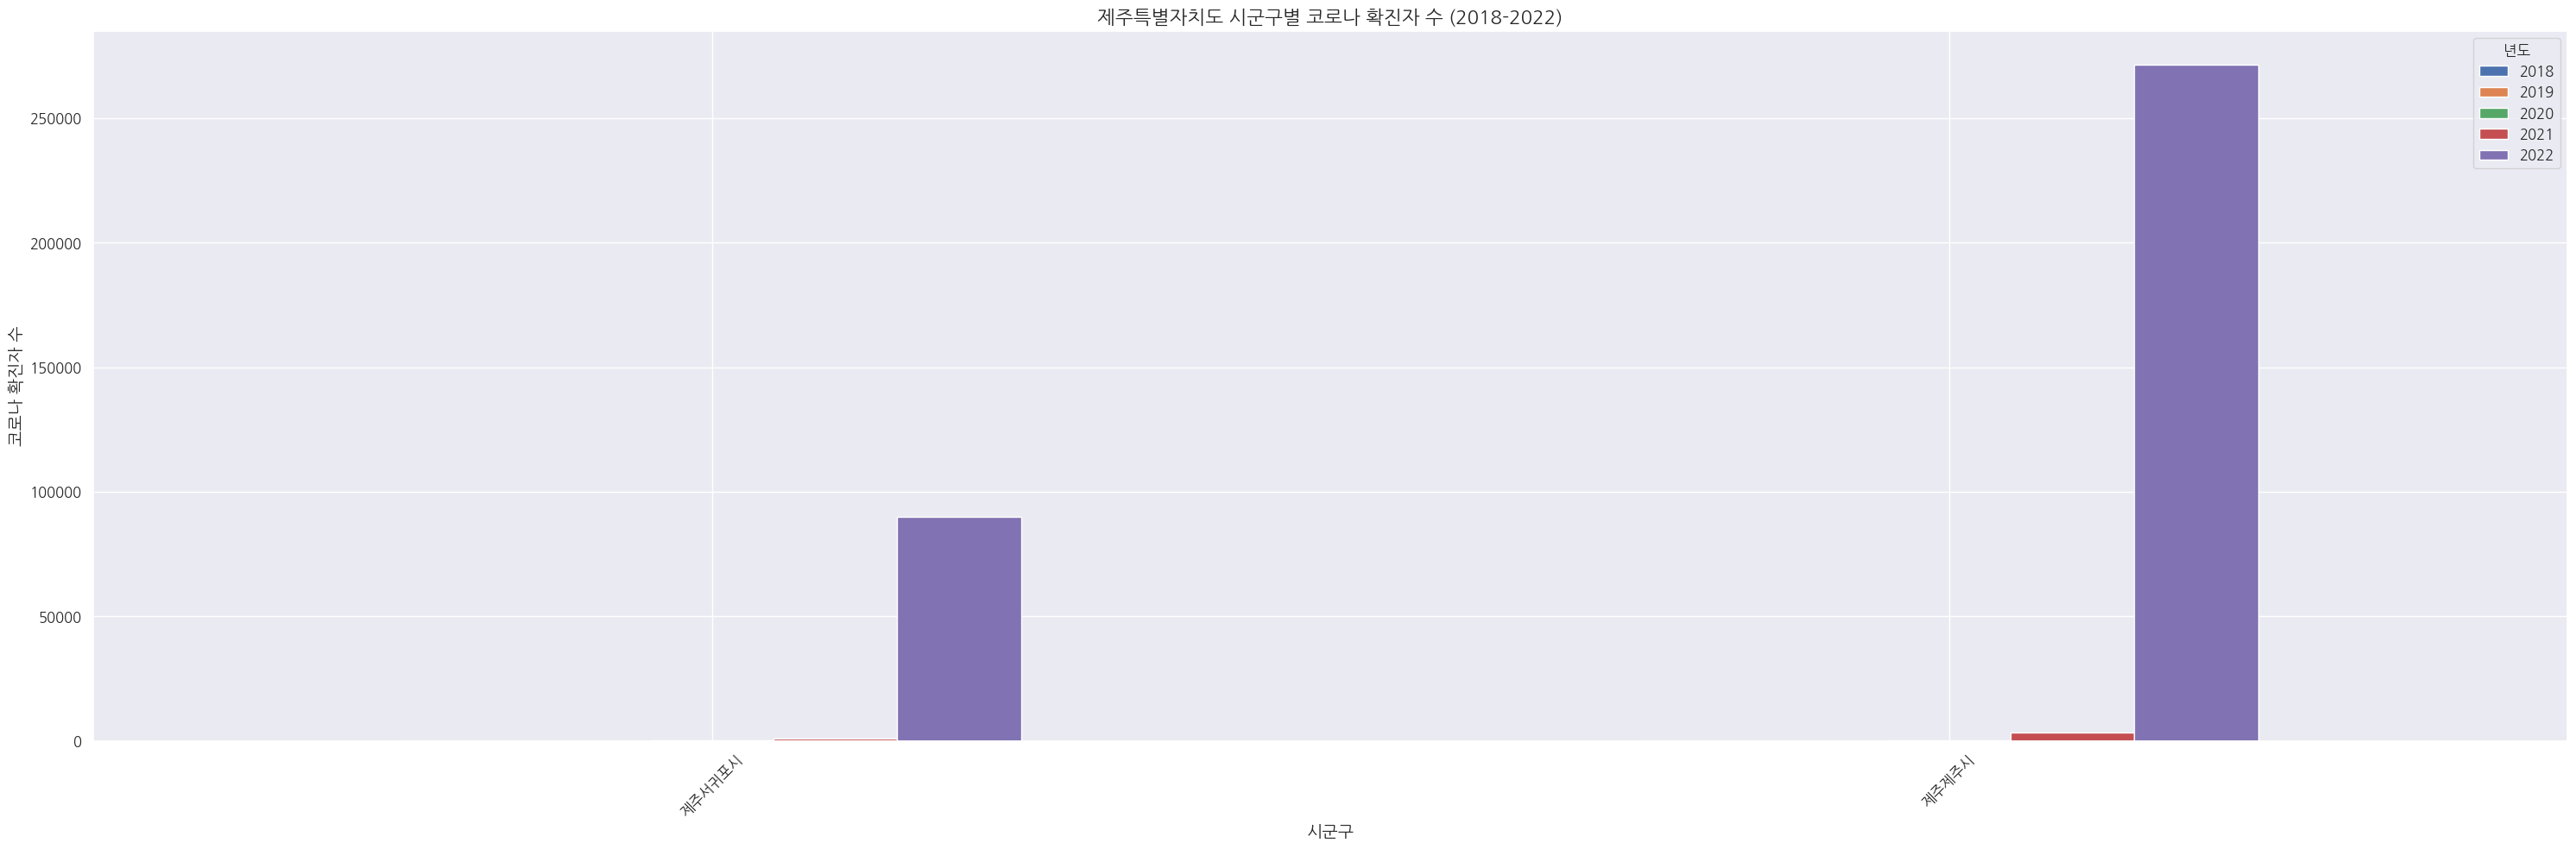

In [144]:
import pandas as pd
import matplotlib.pyplot as plt


# Get unique '시도' values
unique_sido = final['시도'].unique()

for sido in unique_sido:
    sido_data = final[(final['시도'] == sido) & (final['년도'] >= 2018) & (final['년도'] <= 2022)]
    pivoted_data = sido_data.pivot_table(index='시군구', columns='년도', values='코로나확진자수', aggfunc='sum')

    # Subplots 사용하여 fig, ax 객체 생성
    fig, ax = plt.subplots(figsize=(30, 10))  # 가로 길이를 30으로 조정

    # Bar 그래프 그리기
    pivoted_data.plot(kind='bar', stacked=False, ax=ax)

    # 제목 및 레이블 설정
    plt.title(f'{sido} 시군구별 코로나 확진자 수 (2018-2022)', fontsize=16)
    plt.ylabel('코로나 확진자 수', fontsize=14)
    plt.xlabel('시군구', fontsize=14)

    # xticks 조정
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # 범례 설정
    plt.legend(title='년도', fontsize=12)

    # 그래프 레이아웃 조정
    plt.tight_layout()

    # DPI 조정하여 이미지 품질 개선
    plt.savefig(f"{sido}_covid_cases.png", dpi=300)

    # 그래프 보이기
    plt.show()


In [26]:
import plotly.graph_objects as go

# '시도'별 '평균연령'과 '고용률'의 평균을 계산하고 정렬
sido_summary = df.groupby('시도').agg({'평균연령':'mean', '고용률':'mean'}).reset_index()

# 막대 그래프를 위한 Trace 생성
bar_trace = go.Bar(x=sido_summary['시도'], y=sido_summary['평균연령'], 
                   name='평균연령', marker=dict(color='rgb(49,130,189)'),
                   text=sido_summary['평균연령'].round(1), textposition='auto')

# 선형 그래프를 위한 Trace 생성
line_trace = go.Scatter(x=sido_summary['시도'], y=sido_summary['고용률'], 
                        name='고용률', mode='lines+markers+text', 
                        line=dict(color='rgb(214,39,40)'), text=sido_summary['고용률'].round(1),
                        textposition='top center')

# 레이아웃 설정
layout = go.Layout(title='시도별 평균연령 및 고용률', xaxis=dict(title='시도'),
                   yaxis=dict(title='평균연령'), yaxis2=dict(title='고용률', overlaying='y', side='right'))

# Figure 생성 및 표시
fig = go.Figure(data=[bar_trace, line_trace], layout=layout)
fig.update_layout(template="plotly", title_x=0.5)
fig.show()


In [31]:
len(final['시도'].unique())

17

In [32]:
len(final['시군구'].unique())

250

In [33]:
final.describe()

행정번호          년도        우울증환자수         평균연령           총인구수  \
count  1.250000e+03  1250.00000   1250.000000  1250.000000    1250.000000   
mean   3.814814e+09  2020.00000   3776.165600    46.026720  206866.232000   
std    1.131174e+09     1.41478   4074.322496     4.944874  166228.852267   
min    1.111000e+09  2018.00000      0.000000    36.000000    8867.000000   
25%    2.917000e+09  2019.00000    515.250000    42.200000   55743.000000   
50%    4.272500e+09  2020.00000   2889.000000    44.800000  176398.500000   
75%    4.673000e+09  2021.00000   5581.250000    50.100000  312786.500000   
max    5.013000e+09  2022.00000  32947.000000    58.800000  910814.000000   

           스트레스인지율         고용률        코로나확진자수  1인당 정신건강예산(원)       공공시설개수  \
count  1250.000000  1250.00000    1250.000000     1250.00000  1250.000000   
mean     25.172800    62.10044   23230.667200     6624.11040    75.183200   
std       4.360287     5.61868   62572.915299     2275.40401    74.886116   
min       6.200000    46.35000       0.000000     2758.00000     0.000000   
25%      22.500000    58.36250       0.000000     5298.00000    23.000000   
50%      25.500000    60.70000      84.000000     6207.00000    56.000000   
75%      28.100000    65.73750    3100.250000     8050.00000   108.000000   
max      39.800000    84.60000  564132.000000    13975.00000   617.000000   

             우울증지수  
count  1250.000000  
mean      1.655536  
std       2.180987  
min       0.000000  
25%       0.682500  
50%       1.390000  
75%       2.127500  
max      34.800000

In [88]:
cols = ['시도', '년도', '우울증환자수', '평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수', '우울증지수']

In [89]:
df = final[cols]

In [90]:
df = df.rename(columns={'1인당 정신건강예산(원)': '1인당_정신건강예산(원)'})

### **상관관계**

* corrcoef 함수 : 피어슨 상관관계 계수 구해주는 함수
* heatmap 함수 : 상관관계 행렬을 히트맵으로 나타냄

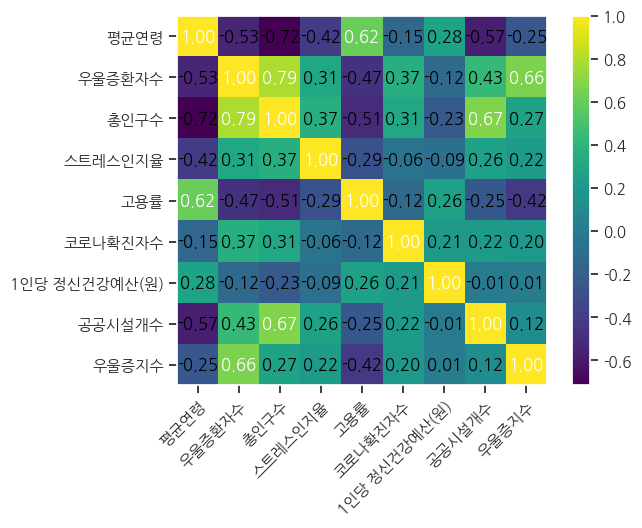

In [27]:
cm = np.corrcoef(final.values.T)
hm = heatmap(cm, row_names= cols, column_names = cols)

plt.show()

### **각 컬럼별 상관관계**

    - 상관관계 높은 순으로 정렬

In [29]:
final.corr().stack()[final.corr().stack()<1].drop_duplicates().abs().sort_values(ascending=False).reset_index()

level_0        level_1         0
0          우울증환자수           총인구수  0.786365
1            평균연령           총인구수  0.715874
2            총인구수         공공시설개수  0.674825
3          우울증환자수          우울증지수  0.663751
4            평균연령            고용률  0.617515
5            평균연령         공공시설개수  0.573853
6            평균연령         우울증환자수  0.529223
7            총인구수            고용률  0.508014
8          우울증환자수            고용률  0.465496
9          우울증환자수         공공시설개수  0.434231
10            고용률          우울증지수  0.424140
11           평균연령        스트레스인지율  0.416707
12         우울증환자수        코로나확진자수  0.367391
13           총인구수        스트레스인지율  0.365905
14           총인구수        코로나확진자수  0.312215
15         우울증환자수        스트레스인지율  0.310235
16        스트레스인지율            고용률  0.285594
17           평균연령  1인당 정신건강예산(원)  0.281040
18           총인구수          우울증지수  0.274841
19            고용률  1인당 정신건강예산(원)  0.263605
20        스트레스인지율         공공시설개수  0.262897
21           평균연령          우울증지수  0.253321
22            고용률         공공시설개수  0.245662
23           총인구수  1인당 정신건강예산(원)  0.229774
24        코로나확진자수         공공시설개수  0.220423
25        스트레스인지율          우울증지수  0.217768
26        코로나확진자수  1인당 정신건강예산(원)  0.206280
27        코로나확진자수          우울증지수  0.197042
28           평균연령        코로나확진자수  0.151659
29            고용률        코로나확진자수  0.124379
30         우울증환자수  1인당 정신건강예산(원)  0.120519
31         공공시설개수          우울증지수  0.116491
32        스트레스인지율  1인당 정신건강예산(원)  0.090431
33        스트레스인지율        코로나확진자수  0.056337
34  1인당 정신건강예산(원)         공공시설개수  0.011847
35  1인당 정신건강예산(원)          우울증지수  0.005143

#### **년도별 우울증지수 평균**

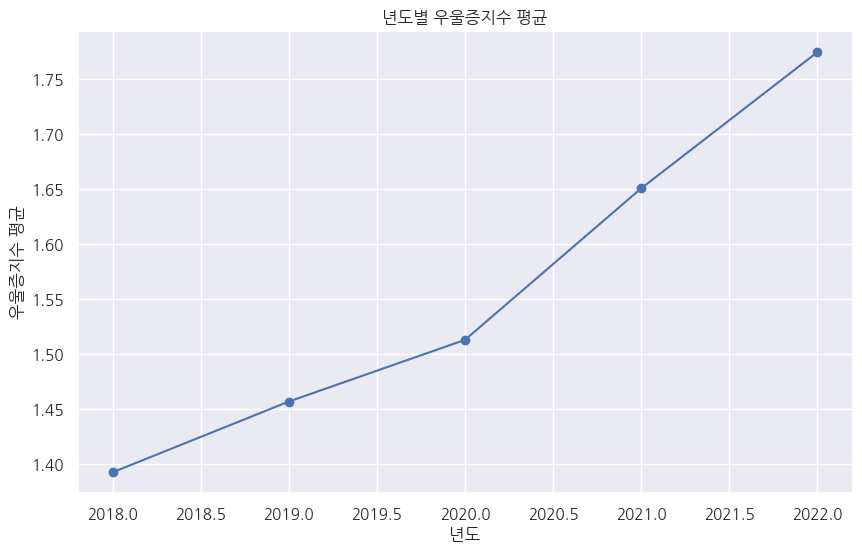

In [31]:
year_dep = df.groupby('년도')['우울증지수'].mean()
 
plt.figure(figsize=(10, 6))
plt.plot(year_dep, marker='o')
plt.title('년도별 우울증지수 평균')
plt.xlabel('년도')
plt.ylabel('우울증지수 평균')
plt.grid(True)
plt.show()
